### I. Data Loading

In [1]:
### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress specific warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

In [3]:
## import Heart dataset
folder_path = "C:/Users/Eliza Bui/Dropbox/2. Johns Hopkins/685.701 DS Modeling and Analytics/HR Analytics Projects/"
file_name = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
full_path = folder_path + file_name
data = pd.read_csv(full_path)

In [4]:
# Display and examine dataset
display(data.info())
display(data.head())
display(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

#### Let's see how columns are currently being loaded

In [5]:
# numerical features
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Features:", numerical_features)

# Count of numerical and categorical features
num_numerical = len(numerical_features)
print(f'Number of numerical columns: {num_numerical}.')

Numerical Features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Number of numerical columns: 26.


In [6]:
# categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

# Count of numerical and categorical features
num_categorical = len(categorical_features)
print(f'Number of categorical columns: {num_categorical}.')

Categorical Features: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Number of categorical columns: 9.


**Observations:** The data set has 1470 entries and 35 columns: 9 categorical and 26 numerical columns. There is currently no missing value in any column, but we need to look carefully into each individual feature to see if there are special characters filled in place of NaN values.

### II. EDA - Single Variable

#### (1) Let's look at categorical features

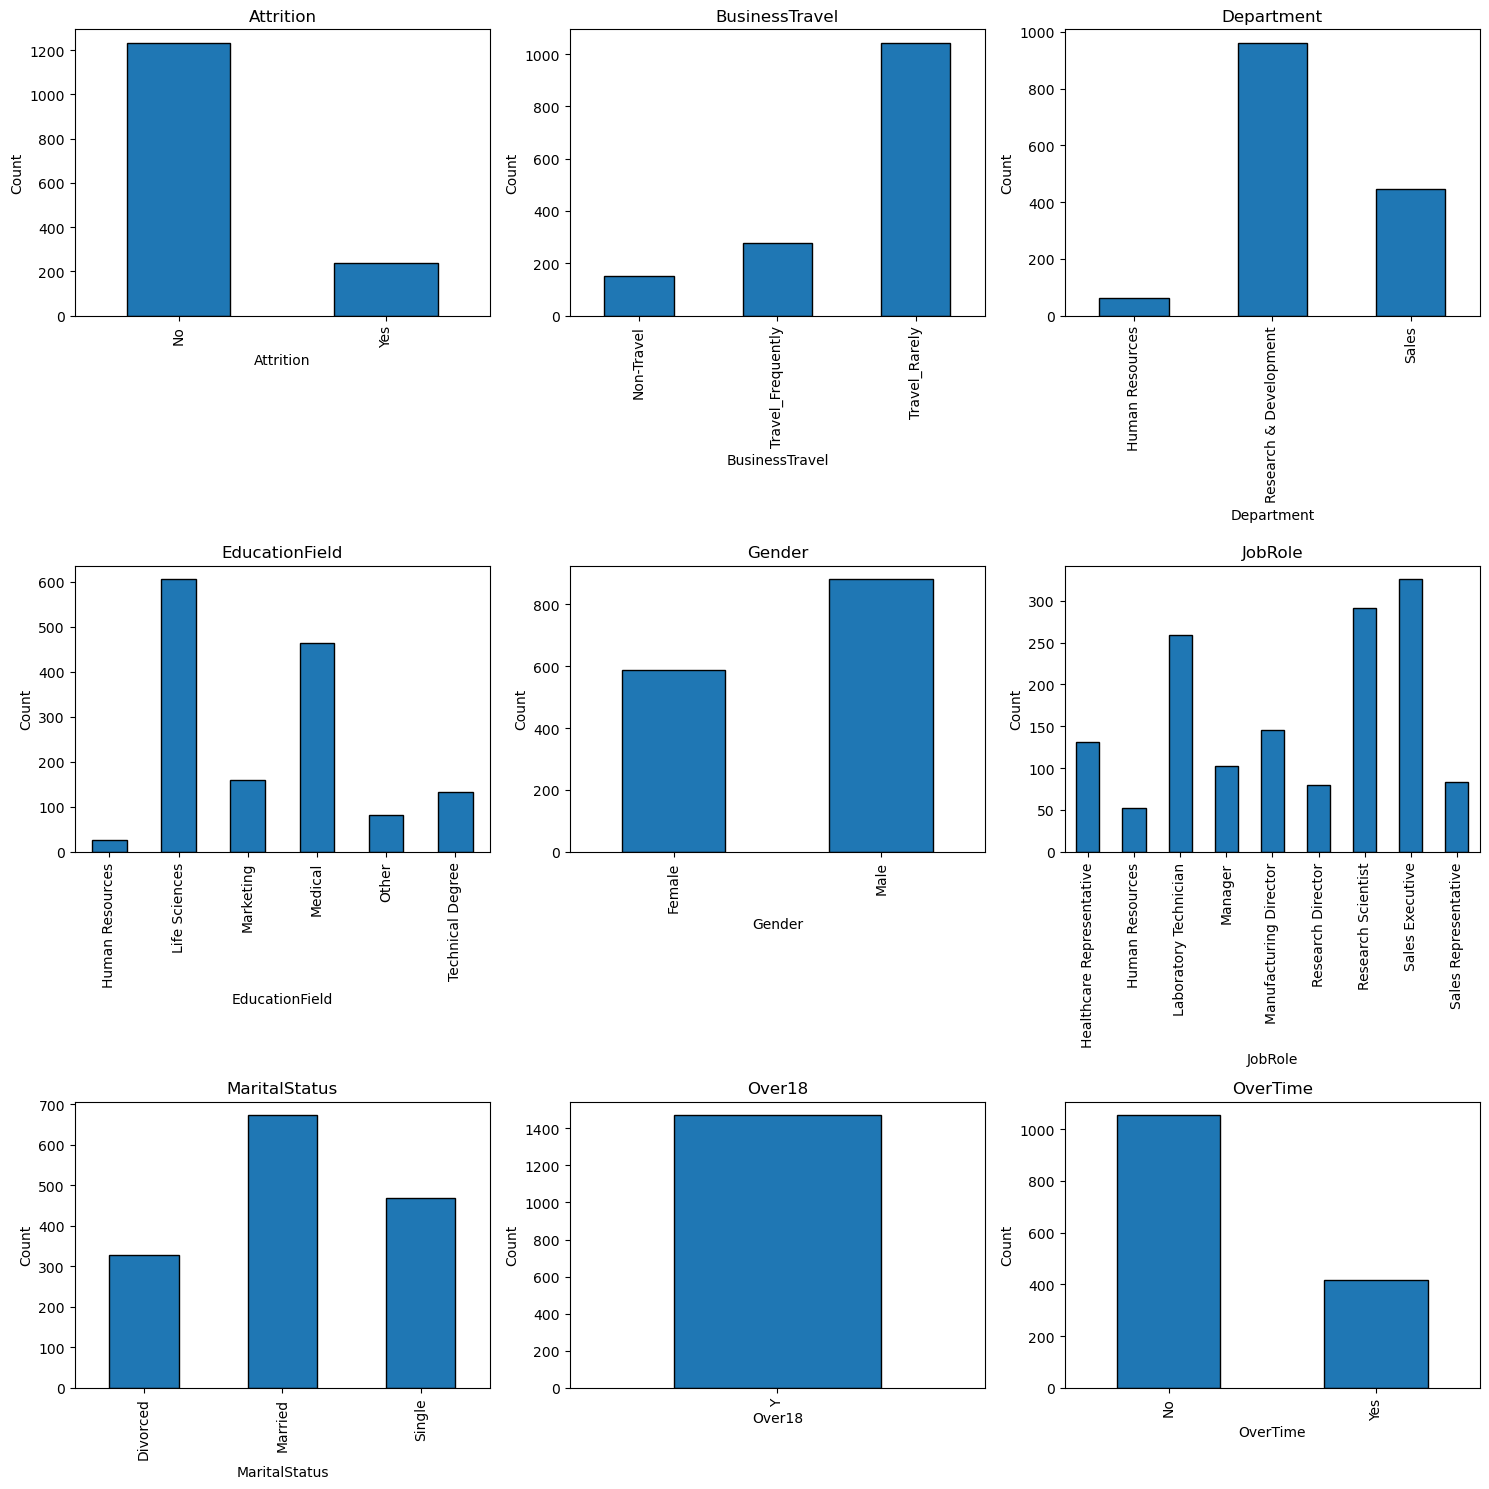

In [7]:
# Set up the plot
num_features = len(categorical_features)
num_rows = (num_features + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Loop through the categorical features and plot histograms
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    data[feature].value_counts().sort_index().plot(kind='bar', ax=ax, edgecolor='k')
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Remove any empty subplots
for i in range(num_features, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:** At a first glance, of the 9 categorical variables, "Over18" stands out to be an odd feature with only 1 category "Over18". It makes perfect sense that a company only employs people older than 18 years old so we can exclude this column from our analysis and modeling.

In [8]:
# Function to get count and proportion of entries for each category
def categorical_feature_counts(df, categorical_features):
    feature_counts = {}
    for feature in categorical_features:
        counts = df[feature].value_counts()
        proportions = df[feature].value_counts(normalize=True)
        feature_counts[feature] = pd.DataFrame({'Count': counts, 'Proportion': proportions})
    return feature_counts

# Call the function and store the results
feature_counts = categorical_feature_counts(data, categorical_features)

# Display the results
for feature, counts in feature_counts.items():
    print(f"Feature: {feature}")
    display(counts)

Feature: Attrition


Count  Proportion
Attrition                   
No          1233    0.838776
Yes          237    0.161224

Feature: BusinessTravel


Count  Proportion
BusinessTravel                      
Travel_Rarely       1043    0.709524
Travel_Frequently    277    0.188435
Non-Travel           150    0.102041

Feature: Department


Count  Proportion
Department                               
Research & Development    961    0.653741
Sales                     446    0.303401
Human Resources            63    0.042857

Feature: EducationField


Count  Proportion
EducationField                     
Life Sciences       606    0.412245
Medical             464    0.315646
Marketing           159    0.108163
Technical Degree    132    0.089796
Other                82    0.055782
Human Resources      27    0.018367

Feature: Gender


Count  Proportion
Gender                   
Male      882         0.6
Female    588         0.4

Feature: JobRole


Count  Proportion
JobRole                                     
Sales Executive              326    0.221769
Research Scientist           292    0.198639
Laboratory Technician        259    0.176190
Manufacturing Director       145    0.098639
Healthcare Representative    131    0.089116
Manager                      102    0.069388
Sales Representative          83    0.056463
Research Director             80    0.054422
Human Resources               52    0.035374

Feature: MaritalStatus


Count  Proportion
MaritalStatus                   
Married          673    0.457823
Single           470    0.319728
Divorced         327    0.222449

Feature: Over18


Count  Proportion
Over18                   
Y        1470         1.0

Feature: OverTime


Count  Proportion
OverTime                   
No         1054    0.717007
Yes         416    0.282993

**Observations:**
- **Attrition**: 83.88% of employees stayed/didnot leave while 16.12% fall into the category of "attrition"
<br>

- **Business Travel**: 70.95% of employees rarely travel, 18.84% travel frequently (who are likely in sales and client-facing roles), and 10.20% do not travel. We will do data exploration of Business Travel & Department interactions
<br>

- **Department**: almost 2/3 of employees work in R&D, less than 1/3 in Sales, and 4.29% in HR. This distribution makes sense as HR is supporting function, in general, G&A (including HR, Finance, Legal, IT, etc.) should account for less than 15% of a firm's headcount. R&D here might include COGS, which creates products and services to sell, should account for a lion share of total headcount
<br>

- **Education Field**: the majority of employees have background in Life Science and Medical (72.78% combined). The next 2 popular backgrounds are Marketing (10.82%) and Other (5.58%). HR is the least popular background (1.84%). We should look at the alignment or lack thereof between Education Background and Department to see if they influence Attrition.
<br>

- **Gender**: 60% employees are Males vs 40% are Females. There is a slight gender imbalance, which we can look further into to see if there is significant interactions between Gender and other variables
<br>

- **Job Role**: The JobRole distribution indicates a concentration in a few key roles: Sales Executive, Research Scientist, and Laboratory Technician, which together account for over half of the workforce. This suggests that these roles may have a significant impact on overall organizational performance and employee dynamics. Additionally, the smaller representation in roles like Human Resources and Research Director highlights potential areas where unique job-specific factors might influence employee experiences differently, necessitating tailored analysis for these groups.
<br>

- **Marital Status:** The MaritalStatus distribution shows that 45.78% of employees are married, 31.97% are single, and 22.24% are divorced. Further analysis might explore how marital status impacts work-life balance, job commitment, and support needs within the workplace, potentially leading to targeted interventions for different groups.
<br>

- **Over Time**: 71.70% of employees do not work overtime, while 28.30% do. This significant proportion of employees working overtime could indicate potential stress or burnout issues. This column could also indicate type of employees: salaried employees like me, even though we work 80 hours a week, are considered professionals and overtime pay is not mandatory

In [9]:
# Check for missing values in categorical features
missing_values_categorical_features = data[categorical_features].isnull().sum()

# Display the count of missing values in each categorical feature
print("Missing values in categorical features:")
print(missing_values_categorical_features)

Missing values in categorical features:
Attrition         0
BusinessTravel    0
Department        0
EducationField    0
Gender            0
JobRole           0
MaritalStatus     0
Over18            0
OverTime          0
dtype: int64


**Observations:** No missing values imputation needed here

#### (2) Let's look at numerical features

In [10]:
# Function to plot histograms with KDE, mean and median lines
def plot_histograms_with_statistics(df, numerical_features):
    # Determine the number of rows needed
    n = len(numerical_features)
    rows = (n + 1) // 2  # Two plots per row

    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))

    for i, feature in enumerate(numerical_features):
        row, col = divmod(i, 2)
        
        # Plot histogram with KDE
        ax = axes[row, col]
        sns.histplot(df[feature], bins=30, kde=True, ax=ax, color='c', edgecolor='k')
        
        # Calculate mean and median
        mean_value = df[feature].mean()
        median_value = df[feature].median()
        
        # Add mean and median lines
        ax.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
        ax.axvline(median_value, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
        
        # Add titles and labels
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.legend()
    
    # If the number of numerical features is odd, remove the last empty subplot
    if n % 2 != 0:
        fig.delaxes(axes[rows - 1, 1])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

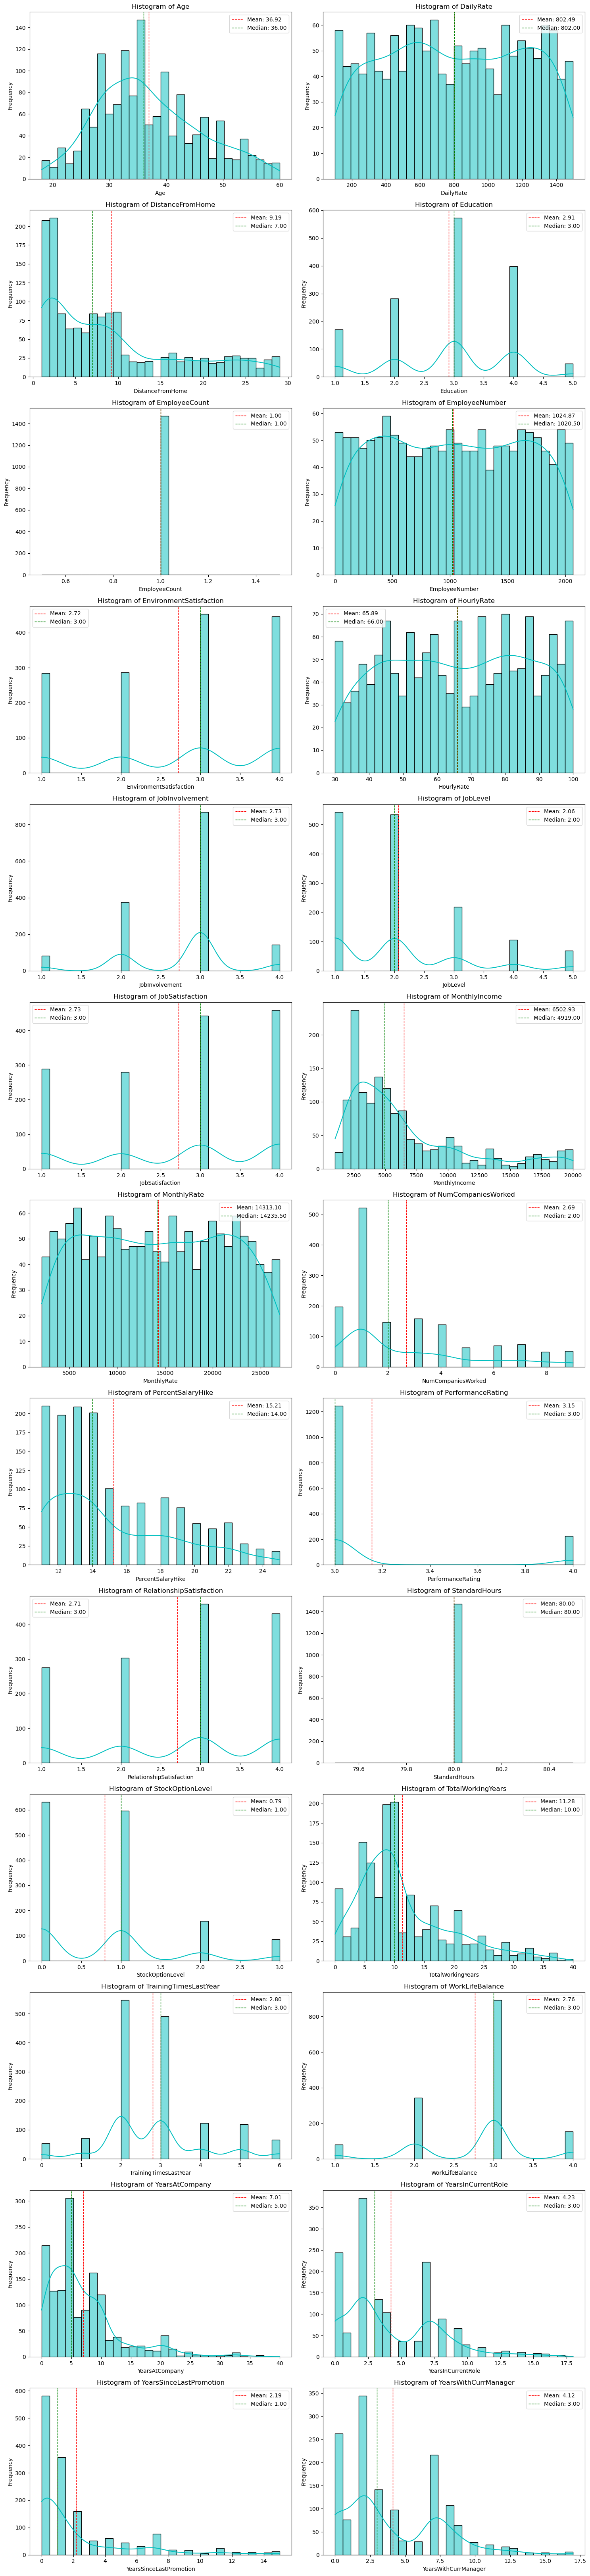

In [11]:
# Call the function to plot histograms
plot_histograms_with_statistics(data, numerical_features)

In [12]:
numerical_features_stat = data[numerical_features].describe().round(2)
display(numerical_features_stat)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count  1470.00    1470.00           1470.00    1470.00         1470.0   
mean     36.92     802.49              9.19       2.91            1.0   
std       9.14     403.51              8.11       1.02            0.0   
min      18.00     102.00              1.00       1.00            1.0   
25%      30.00     465.00              2.00       2.00            1.0   
50%      36.00     802.00              7.00       3.00            1.0   
75%      43.00    1157.00             14.00       4.00            1.0   
max      60.00    1499.00             29.00       5.00            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                     1.00       30.00            1.00   
25%            491.25                     2.00       48.00            2.00   
50%           1020.50                     3.00       66.00            3.00   
75%           1555.75                     4.00       83.75            3.00   
max           2068.00                     4.00      100.00            4.00   

       JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count   1470.00  ...                   1470.00         1470.0   
mean       2.06  ...                      2.71           80.0   
std        1.11  ...                      1.08            0.0   
min        1.00  ...                      1.00           80.0   
25%        1.00  ...                      2.00           80.0   
50%        2.00  ...                      3.00           80.0   
75%        3.00  ...                      4.00           80.0   
max        5.00  ...                      4.00           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count           1470.00            1470.00                1470.00   
mean               0.79              11.28                   2.80   
std                0.85               7.78                   1.29   
min                0.00               0.00                   0.00   
25%                0.00               6.00                   2.00   
50%                1.00              10.00                   3.00   
75%                1.00              15.00                   3.00   
max                3.00              40.00                   6.00   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count          1470.00         1470.00             1470.00   
mean              2.76            7.01                4.23   
std               0.71            6.13                3.62   
min               1.00            0.00                0.00   
25%               2.00            3.00                2.00   
50%               3.00            5.00                3.00   
75%               3.00            9.00                7.00   
max               4.00           40.00               18.00   

       YearsSinceLastPromotion  YearsWithCurrManager  
count                  1470.00               1470.00  
mean                      2.19                  4.12  
std                       3.22                  3.57  
min                       0.00                  0.00  
25%                       0.00                  2.00  
50%                       1.00                  3.00  
75%                       3.00                  7.00  
max                      15.00                 17.00  

[8 rows x 26 columns]

**Observations:**
<br>

- **Age** ranges from 18 to 60, with a mean of 36.92 and a standard deviation of 9.14. The distribution appears fairly balanced with a median close to the mean (36) and slightly right-skewed (towards higher end), suggesting a diverse age range within the workforce.
<br>

- **Daily Rate** spans from 102 to 1499, with a mean of 802.49 and a standard deviation of 403.51. Histogram shows a shape resembling uniform distribution but with local multi-modes. The large range and high standard deviation suggest significant variability in daily rates, indicating a diverse pay structure that could be influenced by factors such as role, tenure, and performance.
<br>

- **DistanceFromHome**: ranges from 1 to 29, with a mean of 9.19 and a standard deviation of 8.11. Histogram is right skewed, as indicated by median (7) < mean (9). The majority of employees live relatively close to work, as indicated by the 25th percentile (2) and the median (7), but there is also a notable proportion of employees with long commutes, which might impact their job satisfaction and work-life balance.
<br>

- **Education**: ranges from 1 ('Below College') to 5 ('Doctor'), with a mean of 2.91 and a standard deviation of 1.02. The median value and mode value are both 3 ('Bachelor'), indicating that a typical employee has a bachelor's degree. This distribution shows a workforce with varying levels of education, contributing to a diverse set of skills and knowledge.
    - Education should also be re-categorized as categorical variable
        1. 'Below College'
        2. 'College'
        3. 'Bachelor'
        4. 'Master'
        5. 'Doctor'

<br>

- **EmployeeCount**: is consistently 1, indicating that each row in the dataset corresponds to one employee. This feature doesn't provide additional insights but confirms the structure of the dataset. It should be excluded from modeling.
<br>

- **EmployeeNumber**:ranges from 1 to 2068, serving as a unique identifier for each employee. This feature does not provide direct analytical value but is essential for distinguishing individual records. It should be excluded from modeling.
<br>

- **EnvironmentSatisfaction**: ranges from 1 to 4, with a mean of 2.72 and median of 3. More people rating 3 & 4 combined than rating 1 & 2 combined, suggesting that most employees rate their work environment satisfaction as high.
    - EnvironmentSatisfaction should also be re-categorized as categorical variable
        1. 'Low'
        2. 'Medium'
        3. 'High'
        4. 'Very High'

<br>

- **HourlyRate**: varies from 30 to 100, with a mean of 65.89 and a standard deviation of 20.33. The wide range and high standard deviation indicate a diverse pay structure, potentially linked to differing job roles, seniority levels, and job functions.
<br>
    
- **JobInvolvement**: ranges from 1 to 4, with a mean of 2.73 and median of 3. The vast majority of rating is 3, indicating that most employees have a moderate to high level of job involvement, which is generally positive for productivity and engagement.
    - JobInvolvement should also be re-categorized as categorical variable
        1. 'Low'
        2. 'Medium'
        3. 'High'
        4. 'Very High'

<br>

- **JobLevel**: varies from 1 to 5, with a mean of 2.06 and a standard deviation of 1.11. The median is 2, indicating that the majority of employees hold lower to mid-level positions. This distribution reflects organizational dynamics and opportunities for career advancement. There could be different attrition rates amongst different job levels.
<br>

- **JobSatisfaction** ranges from 1 ('Low') to 4 ('Very High'), with a mean of 2.73 and a standard deviation of 1.1. The median is 3 ('High') and more people rating 3 & 4 combined than rating 1 & 2 combined indicate that most employees are generally satisfied with their jobs.
    - JobSatisfaction should also be re-categorized as categorical variable
        1. 'Low'
        2. 'Medium'
        3. 'High'
        4. 'Very High'

<br>

- **MonthlyIncome** varies widely from 1009 to 19999, with a mean of 6502.93 and a standard deviation of 4707.95. The median income is 4919, which is notably lower than the mean, indicating a right-skewed distribution. This high standard deviation and disparity between the mean and median suggest significant income inequality among employees, likely reflecting differences in job roles, seniority, and performance. 
<br>

- **MonthlyRate** ranges from 2094 to 26999, with a mean of 14313.10 and a standard deviation of 7116.27. The distribution shows significant variability in monthly rates, which likely corresponds to the diverse job roles and seniority levels within the organization. The variability in MonthlyRate aligns with the wide range observed in HourlyRate. My suspicion is that MonthlyRate and HourlyRate related by some formula, like Monthly Rate / monthly hours = Hourly Rate, which essensially indicate that we only need to include 1 feature in models
<br>

- **NumCompaniesWorked** ranges from 0 to 9, with a mean of 2.69, a median of 2, and a standard deviation of 2.67. The mode is 1, indicating that many employees have worked for only one company. This suggests moderate job mobility, with a significant portion of the workforce being relatively stable. The presence of employees who have worked for multiple companies may indicate diverse experiences and skill sets and especially age as older employees have had more time to change jobs. Consider binning thi variables into buckets.
<br>

- **PercentSalaryHike** ranges from 11% to 25%, with a mean of 15.21% and a standard deviation of 3.66%. This variable has a distribution that appears more discrete than continuous, with distinct peaks percentage points less than median points of 14%. This indicates that salary increases are likely determined by set percentage bands rather than a smooth, continuous range. This structured approach suggests that salary reviews are likely based on specific criteria or performance bands.
    - PercentSalaryHike could also be viewed as a categorical variable
    
<br>

- **PerformanceRating** shows 2 distinct levels: 3 and 4, with a mean of 3.15 and a standard deviation of 0.36. The quartiles (25th, 50th, and 75th) all equal 3, indicating that the majority of employees receive a rating of 3, with only a small number receiving the highest rating of 4. This highly discrete and skewed distribution suggests that performance ratings are predominantly high, with no employee rated below a 3. This could imply a rating system that does not differentiate well among different levels of performance. 
<br>

- **RelationshipSatisfaction**: ranges from 1 to 4, with a mean of 2.71 and a standard deviation of 1.08. The median is 3, suggesting that employees generally have moderate to high relationship satisfaction at work.
    - RelationshipSatisfaction
        1. 'Low'
        2. 'Medium'
        3. 'High'
        4. 'Very High'

<br>

- **StandardHours**: is consistently 80 for all employees with no variation, which could just simply a paper-work number that doesn't mean much. We can exclude this column from modeling.
<br>

- **StockOptionLevel**: ranges from 0 to 3, with a mean of 0.79 and a standard deviation of 0.85. The median is 1, indicating that most employees have at least some stock options. The distribution shows that 25% of employees have no stock options, 50% have a level of 1, and 75% have a level of 1 or below. The relatively low mean and mode suggest that higher levels of stock options (levels 2 and 3) are less common.
<br>

- **TotalWorkingYears** ranges from 0 to 40, with a mean of 11.28 and a standard deviation of 7.78. The quartiles show that 25% of employees have 6 years or less, 50% have 10 years or less, and 75% have 15 years or less of total working experience. The distribution is right-skewed, suggesting that while most employees have moderate experience, there are some with extensive working years, which can bring varied perspectives and skills but may also necessitate different approaches to training, development, and career advancement.
<br>

- **TrainingTimesLastYear** ranges from 0 to 6. The quartiles show that 25% of employees have 2 or fewer training sessions, 50% have 3 or fewer, and 75% have 3 or fewer. The distribution is right-skewed, indicating that while most employees receive 2-3 trainings, some receive significantly more, which may reflect tailored development plans for specific roles or performance levels. We could bin this variables into chunks
<br>

- **WorkLifeBalance** ranges from 1 to 4, with a mean of 2.76 and a standard deviation of 0.71. The vast majority of employees give rating of 3. We could check if this rating varies by roles, job level, or other variables
<br>

- **YearsAtCompany** ranges from 0 to 40, with a mean of 7.01 and a standard deviation of 6.13. The quartiles show that 25% of employees have 3 or fewer years at the company, 50% have 5 or fewer, and 75% have 9 or fewer. The distribution is right-skewed, indicating that while most employees have a relatively short to moderate tenure, there are some with significantly longer tenures. This suggests a mix of new hires and long-term employees, which can affect organizational dynamics and knowledge retention.
<br>

- **YearsInCurrentRole** ranges from 0 to 18, with a mean of 4.23 and a standard deviation of 3.62. The quartiles show that 25% of employees have 2 or fewer years in their current role, 50% have 3 or fewer, and 75% have 7 or fewer. The distribution is right-skewed, indicating that while many employees have relatively short tenures in their current roles, some have been in the same role for a significantly longer period. This mix suggests varying levels of role stability and potential opportunities for career development. We should look at interaction of this variable with job level because early-career employees can be promoted faster but middle to senior managers take longer to be promoted to next level.
<br>

- **YearsSinceLastPromotion** ranges from 0 to 15, with a mean of 2.19 and a standard deviation of 3.22. The distribution is right-skewed, indicating that while many employees have been promoted relatively recently, some have gone many years without a promotion. This variability suggests different career progression rates, which can impact employee motivation and satisfaction. I expect this variable to correlate strongly with YearsInCurrentRole and thus only one should be used in the model
<br>

- **YearsWithCurrManager** ranges from 0 to 17, with a mean of 4.12 and a standard deviation of 3.57. The quartiles show that 25% of employees have 2 or fewer years with their current manager, 50% have 3 or fewer, and 75% have 7 or fewer. The distribution is right-skewed, indicating that while many employees have relatively short to moderate tenures with their current manager, some have much longer relationships.


#### Let's check uniqueness of EmployeeNumber before removing this column

In [13]:
# Get count of unique values for 'EmployeeNumber'
unique_employee_numbers_count = data['EmployeeNumber'].nunique()
print("Count of unique EmployeeNumber:", unique_employee_numbers_count)

Count of unique EmployeeNumber: 1470


**Observations:** Each employee has their unique EmployeeNumber, thus we can remove this column

#### Let's check if Monthly Rate and Hourly Rate are essentially the same info, meaning that their ratios are fixed

count    1470.000000
mean      243.345719
std       155.844962
min        23.228261
25%       121.698764
50%       215.169125
75%       323.004444
max       876.166667
Name: MonthlyRate_to_HourlyRate, dtype: float64

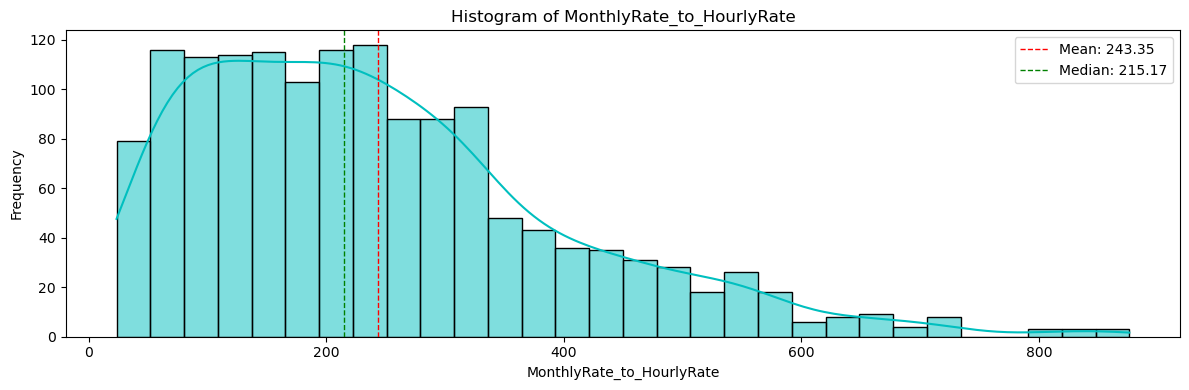

In [14]:
# Calculate the ratio of MonthlyRate to HourlyRate and add it to the DataFrame
data['MonthlyRate_to_HourlyRate'] = data['MonthlyRate'] / data['HourlyRate']

# Get basic statistics for the MonthlyRate_to_HourlyRate column
basic_stats = data['MonthlyRate_to_HourlyRate'].describe()
display(basic_stats)

# Create a histogram for MonthlyRate_to_HourlyRate
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data['MonthlyRate_to_HourlyRate'], bins=30, kde=True, ax=ax, color='c', edgecolor='k')

# Add mean and median
mean_value = data['MonthlyRate_to_HourlyRate'].mean()
median_value = data['MonthlyRate_to_HourlyRate'].median()
ax.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
ax.axvline(median_value, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

# Add titles and labels
ax.set_title('Histogram of MonthlyRate_to_HourlyRate')
ax.set_xlabel('MonthlyRate_to_HourlyRate')
ax.set_ylabel('Frequency')
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:** Monthly rate and Hourly Rate are not related directly by a multiplication formula as suspected. We will need to determine later to keep one or both.

In [15]:
# Identify the top 5 and bottom 5 values for MonthlyRate_to_HourlyRate
top_5_Month_to_Hourly_Rate = data.nlargest(5, 'MonthlyRate_to_HourlyRate')
bottom_5_Month_to_Hourly_Rate = data.nsmallest(5, 'MonthlyRate_to_HourlyRate')

# Select specified columns
columns_to_show = ['Attrition', 'Department', 'Age', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 'MonthlyRate_to_HourlyRate']
top_5_Month_to_Hourly_Rate = top_5_Month_to_Hourly_Rate[columns_to_show]
bottom_5_Month_to_Hourly_Rate = bottom_5_Month_to_Hourly_Rate[columns_to_show]

# Print the results
print("Top 5 MonthlyRate_to_HourlyRate:")
display(top_5_Month_to_Hourly_Rate)

print("\nBottom 5 MonthlyRate_to_HourlyRate:")
display(bottom_5_Month_to_Hourly_Rate)

Top 5 MonthlyRate_to_HourlyRate:


Attrition              Department  Age  JobLevel  MonthlyIncome  \
291        No  Research & Development   36         2           4485   
81         No  Research & Development   35         1           2859   
110        No  Research & Development   51         3           7484   
513       Yes  Research & Development   20         1           1009   
78         No  Research & Development   37         3          13664   

     MonthlyRate  HourlyRate  MonthlyRate_to_HourlyRate  
291        26285          30                 876.166667  
81         26278          30                 875.933333  
110        25796          30                 859.866667  
513        26999          32                 843.718750  
78         25258          30                 841.933333


Bottom 5 MonthlyRate_to_HourlyRate:


Attrition              Department  Age  JobLevel  MonthlyIncome  \
178        No                   Sales   46         3          10453   
63         No                   Sales   59         3           7637   
613        No         Human Resources   34         1           3737   
789       Yes         Human Resources   44         3          10482   
2         Yes  Research & Development   37         1           2090   

     MonthlyRate  HourlyRate  MonthlyRate_to_HourlyRate  
178         2137          92                  23.228261  
63          2354          99                  23.777778  
613         2243          88                  25.488636  
789         2326          91                  25.560440  
2           2396          92                  26.043478

**Observations:** 
- My original speculation is that MonthlyRate is a function of HourlyRate like MonthlyRate = HourlyRate * Numbers of hours worked in a month but it is NOT the case here since the ratio ranges from 23 to 876. It doesn't make practical sense to clock in 876 working hours a month
- Without Subject Matter Expert, it remains a question why MonthlyRate_to_HourlyRate ratios are vastly different between employees because it's not restricted to specific Department, Age, or JobLevel

#### Let's check the relationship between DailyRate and Hourly Rate to see if they carry the same info

Top 5 DailyRate_to_HourlyRate:


Attrition  Age  JobLevel  DailyRate  MonthlyRate  HourlyRate  \
408        No   52         4       1490        10310          30   
172        No   36         1       1480        15062          30   
110        No   51         3       1456        25796          30   
867        No   50         4       1421         9490          30   
105        No   59         5       1420        21922          32   

     DailyRate_to_HourlyRate  
408                49.666667  
172                49.333333  
110                48.533333  
867                47.366667  
105                44.375000


Bottom 5 DailyRate_to_HourlyRate:


Attrition  Age  JobLevel  DailyRate  MonthlyRate  HourlyRate  \
314         No   39         4        117         5355          99   
1437        No   39         5        105        15302          87   
884         No   40         2        107        11591          84   
636        Yes   35         1        130        16612          96   
1132        No   40         2        118        11262          84   

      DailyRate_to_HourlyRate  
314                  1.181818  
1437                 1.206897  
884                  1.273810  
636                  1.354167  
1132                 1.404762

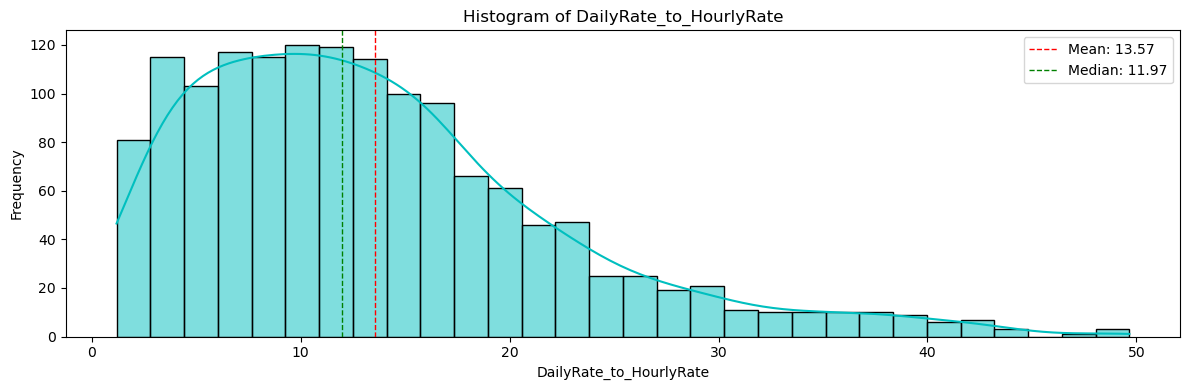

In [16]:
# Calculate the ratio of DailyRate to HourlyRate and add it to the DataFrame
data['DailyRate_to_HourlyRate'] = data['DailyRate'] / data['HourlyRate']

# Identify the top 5 and bottom 5 values for DailyRate_to_HourlyRate
top_5_Income_to_Hourly_Rate = data.nlargest(5, 'DailyRate_to_HourlyRate')
bottom_5_Income_to_Hourly_Rate = data.nsmallest(5, 'DailyRate_to_HourlyRate')

# Select specified columns
columns_to_show = ['Attrition', 'Age', 'JobLevel', 'DailyRate', 'MonthlyRate', 'HourlyRate', 'DailyRate_to_HourlyRate']
top_5_Income_to_Hourly_Rate = top_5_Income_to_Hourly_Rate[columns_to_show]
bottom_5_Income_to_Hourly_Rate = bottom_5_Income_to_Hourly_Rate[columns_to_show]

# Print the results
print("Top 5 DailyRate_to_HourlyRate:")
display(top_5_Income_to_Hourly_Rate)
print("\nBottom 5 DailyRate_to_HourlyRate:")
display(bottom_5_Income_to_Hourly_Rate)

# Plot histogram for DailyRate_to_HourlyRate
fig, ax = plt.subplots(figsize=(12, 4))

# Plot histogram with KDE
sns.histplot(data['DailyRate_to_HourlyRate'], bins=30, kde=True, ax=ax, color='c', edgecolor='k')

# Calculate mean and median
mean_value = data['DailyRate_to_HourlyRate'].mean()
median_value = data['DailyRate_to_HourlyRate'].median()

# Add mean and median lines
ax.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
ax.axvline(median_value, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

# Add titles and labels
ax.set_title('Histogram of DailyRate_to_HourlyRate')
ax.set_xlabel('DailyRate_to_HourlyRate')
ax.set_ylabel('Frequency')
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:** 
- My original speculation is that DailyRate is a function of HourlyRate like DailyRate = HourlyRate * Numbers of hours worked in a day but it is NOT the case here since the ratio ranges up to 49.67. It doesn't make practical sense to clock in 49.67 working hours a day
- Without Subject Matter Expert, it remains a question why DailyRate_to_HourlyRate ratios are vastly different between employees because it's not restricted to specific Department, Age, or JobLevel

#### Let's check the relationship between Monthly Income and Hourly Rate to see if they carry the same info

Top 5 MonthlyIncome_to_HourlyRate:


Attrition  Age  JobLevel  MonthlyIncome  MonthlyRate  HourlyRate  \
595        Yes   58         5          19246        25761          31   
1140        No   44         5          19049         3549          31   
867         No   50         4          17856         9490          30   
105         No   59         5          18844        21922          32   
112         No   54         4          17328        13871          30   

      MonthlyIncome_to_HourlyRate  
595                    620.838710  
1140                   614.483871  
867                    595.200000  
105                    588.875000  
112                    577.600000


Bottom 5 MonthlyIncome_to_HourlyRate:


Attrition  Age  JobLevel  MonthlyIncome  MonthlyRate  HourlyRate  \
1338       Yes   30         1           1081        16019          89   
23          No   21         1           1232        19281          96   
764         No   28         1           1052        23384          74   
727         No   18         1           1051        13493          73   
1205       Yes   32         1           1393        24852          95   

      MonthlyIncome_to_HourlyRate  
1338                    12.146067  
23                      12.833333  
764                     14.216216  
727                     14.397260  
1205                    14.663158

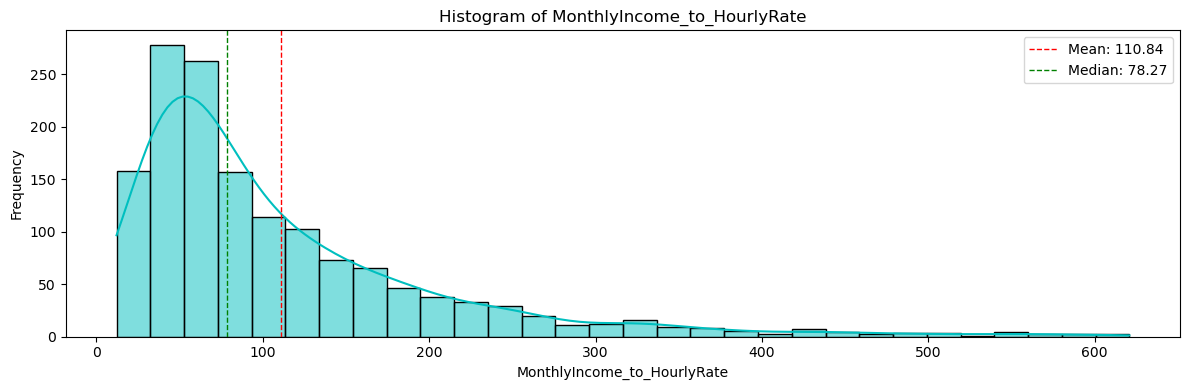

In [17]:
# Calculate the ratio of MonthlyIncome to HourlyRate and add it to the DataFrame
data['MonthlyIncome_to_HourlyRate'] = data['MonthlyIncome'] / data['HourlyRate']

# Identify the top 5 and bottom 5 values for MonthlyIncome_to_HourlyRate
top_5_Income_to_Hourly_Rate = data.nlargest(5, 'MonthlyIncome_to_HourlyRate')
bottom_5_Income_to_Hourly_Rate = data.nsmallest(5, 'MonthlyIncome_to_HourlyRate')

# Select specified columns
columns_to_show = ['Attrition', 'Age', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 'MonthlyIncome_to_HourlyRate']
top_5_Income_to_Hourly_Rate = top_5_Income_to_Hourly_Rate[columns_to_show]
bottom_5_Income_to_Hourly_Rate = bottom_5_Income_to_Hourly_Rate[columns_to_show]

# Print the results
print("Top 5 MonthlyIncome_to_HourlyRate:")
display(top_5_Income_to_Hourly_Rate)
print("\nBottom 5 MonthlyIncome_to_HourlyRate:")
display(bottom_5_Income_to_Hourly_Rate)

# Plot histogram for MonthlyIncome_to_HourlyRate
fig, ax = plt.subplots(figsize=(12, 4))

# Plot histogram with KDE
sns.histplot(data['MonthlyIncome_to_HourlyRate'], bins=30, kde=True, ax=ax, color='c', edgecolor='k')

# Calculate mean and median
mean_value = data['MonthlyIncome_to_HourlyRate'].mean()
median_value = data['MonthlyIncome_to_HourlyRate'].median()

# Add mean and median lines
ax.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
ax.axvline(median_value, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

# Add titles and labels
ax.set_title('Histogram of MonthlyIncome_to_HourlyRate')
ax.set_xlabel('MonthlyIncome_to_HourlyRate')
ax.set_ylabel('Frequency')
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:** 
- It doesn't seem like Monthly Income is related to Hourly Rate by a standard formula like Monthly Income = Hourly Rate * Numbers of Hours Worked because the Ration of MonthlyIncome_to_hourlyRate ranges from 12 to 600+, meaning that some people work 12 hours but others work more than 600 hours in a month.

**It's likely that MonthlyRate, DailyRate and HourlyRate don't mean much and we should only use MonthlyIncome in modeling but we can use Feature Importance to confirm elimination of these columns**

### III. EDA: Variable Pairs

### 3.1. Clean and Organize features 

#### Remove columns that don't contribute any values to analysis

In [18]:
# Remove the specified columns
columns_to_remove = ['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'MonthlyRate_to_HourlyRate', 'MonthlyIncome_to_HourlyRate', 'DailyRate_to_HourlyRate' ]
data = data.drop(columns=columns_to_remove)

#### Let's put variables into correct groupings

In [19]:
### Nominal categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

# Count of numerical and categorical features
num_categorical = len(categorical_features)
print(f'Number of categorical columns: {num_categorical}.')

Categorical Features: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Number of categorical columns: 8.


In [20]:
# Numerical Features
numerical_features = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'DistanceFromHome', 
                      'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                      'TotalWorkingYears', 'YearsAtCompany', 
                      'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Ordinal Features
ordinal_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 
                    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 
                    'StockOptionLevel', 'WorkLifeBalance', 'TrainingTimesLastYear']

In [21]:
print(f"Number of numerical columns: {len(numerical_features)}")
print(f"Number of ordinal columns: {len(ordinal_features)}")

Number of numerical columns: 13
Number of ordinal columns: 10


In [22]:
print(f"Current Number of columns in dataset: {data.shape[1]}")

Current Number of columns in dataset: 31


In [23]:
# Combine the three lists
all_features = numerical_features + ordinal_features + categorical_features

# Check if all features match the columns in data
data_columns = set(data.columns)
features_set = set(all_features)

# Find missing features in data columns
missing_in_data = features_set - data_columns
# Find extra columns in data not listed in features
extra_in_data = data_columns - features_set

print(f"Missing in data: {missing_in_data}")
print(f"Extra in data: {extra_in_data}")

# Check if they match
if features_set == data_columns:
    print("The list of all columns in the variable lists matches the columns in data.")
else:
    print("There are mismatches between the variable lists and columns in data.")

Missing in data: set()
Extra in data: set()
The list of all columns in the variable lists matches the columns in data.


### 3.2. One-hot Encoding categorical features

In [24]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [25]:
#data_encoded.info()

### 3.3. Pairwise Correlation Matrix between all pairs of variables

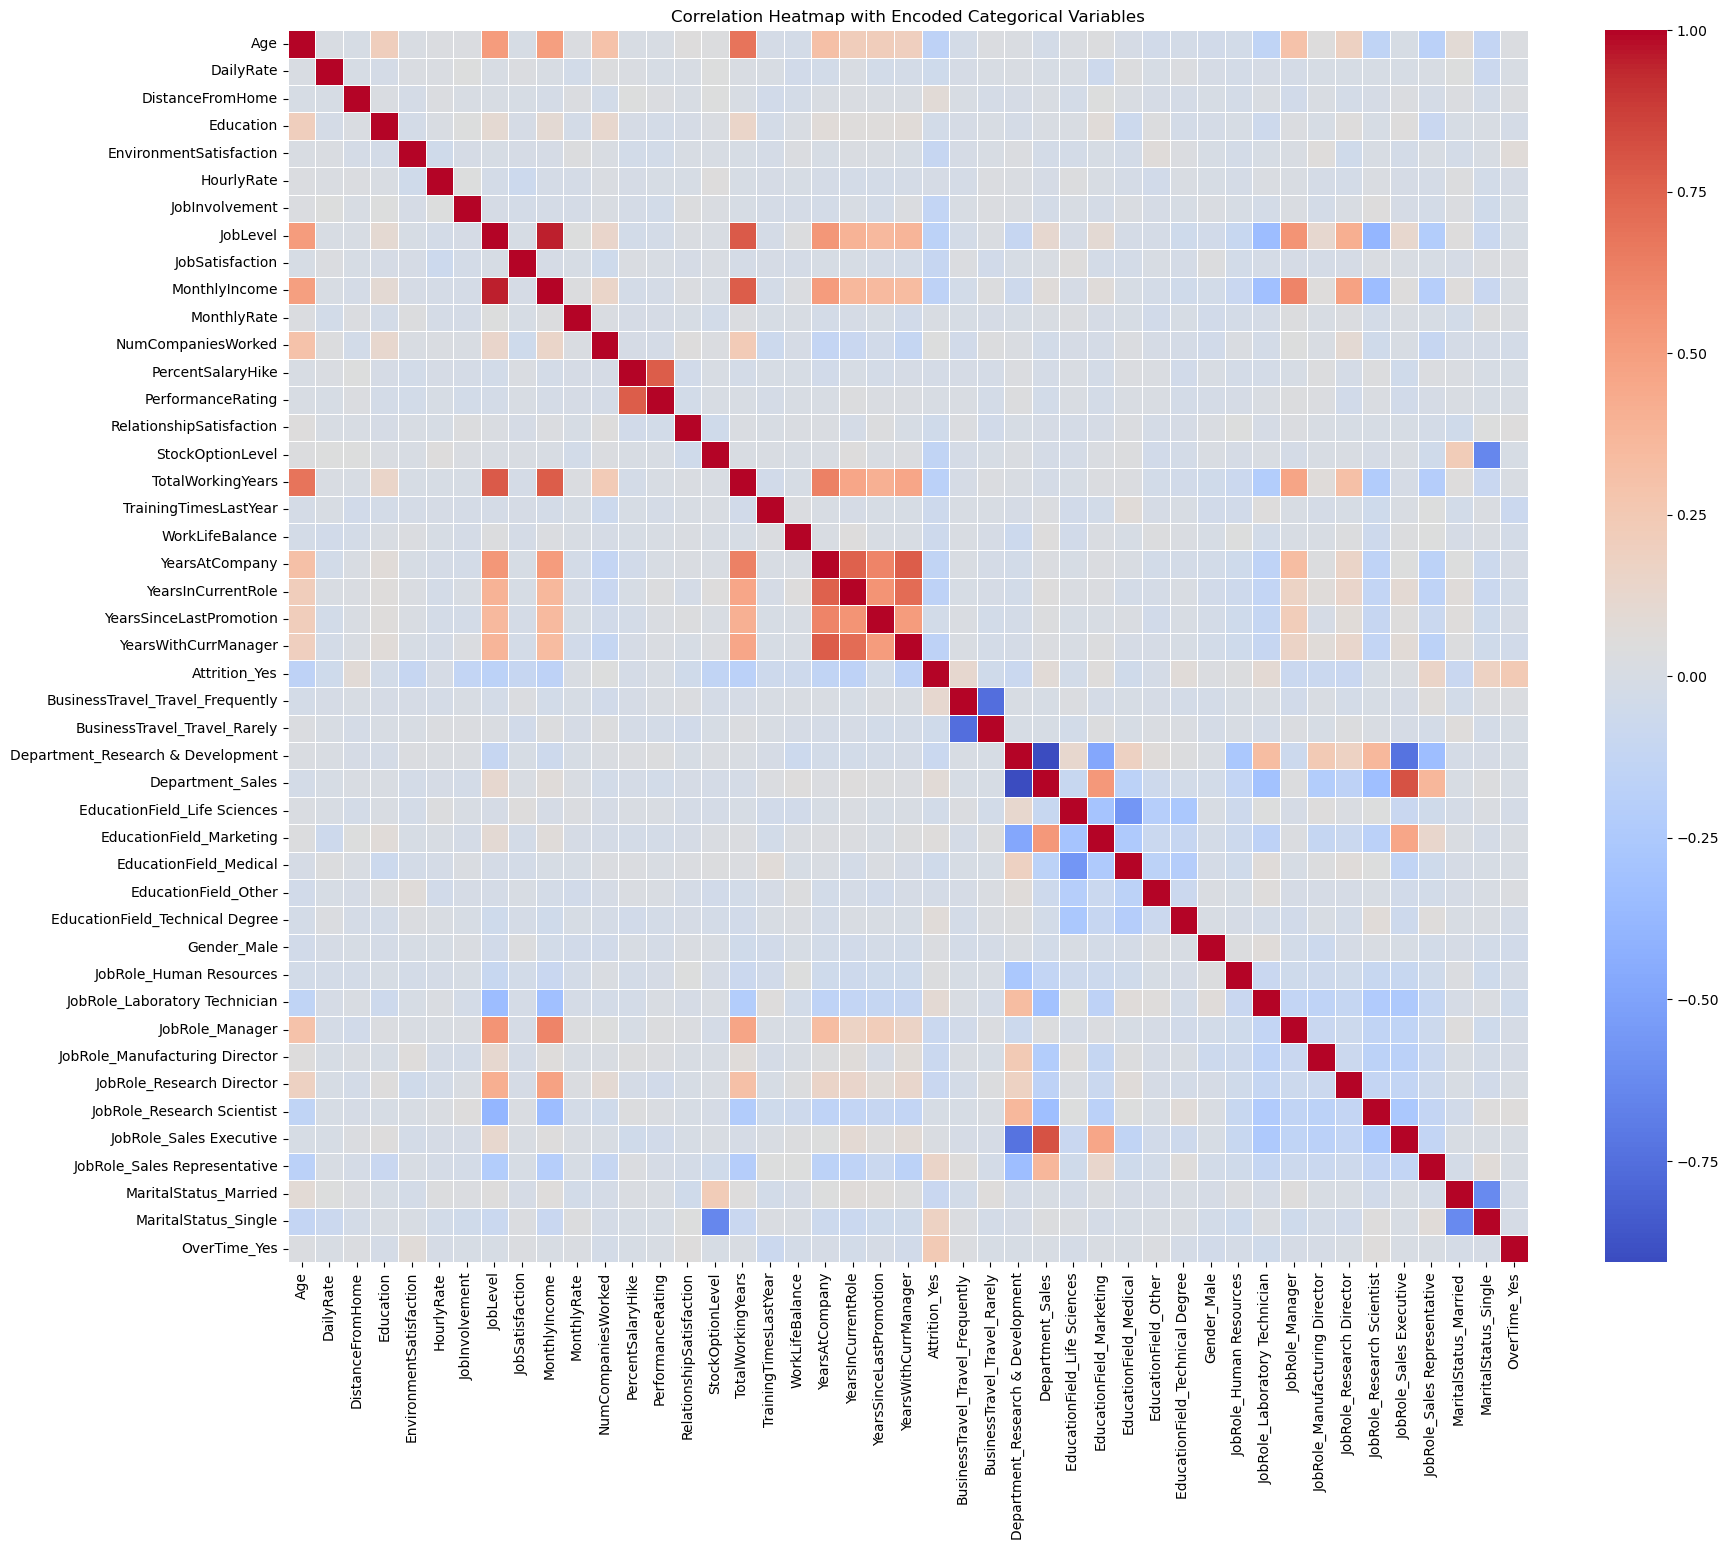

In [26]:
# Calculate the correlation matrix including encoded nominal features
correlation_matrix_encoded = data_encoded.corr()

# Plot the heatmap for all features including encoded nominal features
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_encoded, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Encoded Categorical Variables')
plt.show()

#### Let's focus on variable pairs with correlation coefficients either > 0.5 or < -0.5

JobLevel                           MonthlyIncome                        0.950300
MonthlyIncome                      JobLevel                             0.950300
Department_Sales                   JobRole_Sales Executive              0.808869
JobRole_Sales Executive            Department_Sales                     0.808869
TotalWorkingYears                  JobLevel                             0.782208
JobLevel                           TotalWorkingYears                    0.782208
PercentSalaryHike                  PerformanceRating                    0.773550
PerformanceRating                  PercentSalaryHike                    0.773550
MonthlyIncome                      TotalWorkingYears                    0.772893
TotalWorkingYears                  MonthlyIncome                        0.772893
YearsAtCompany                     YearsWithCurrManager                 0.769212
YearsWithCurrManager               YearsAtCompany                       0.769212
YearsInCurrentRole          

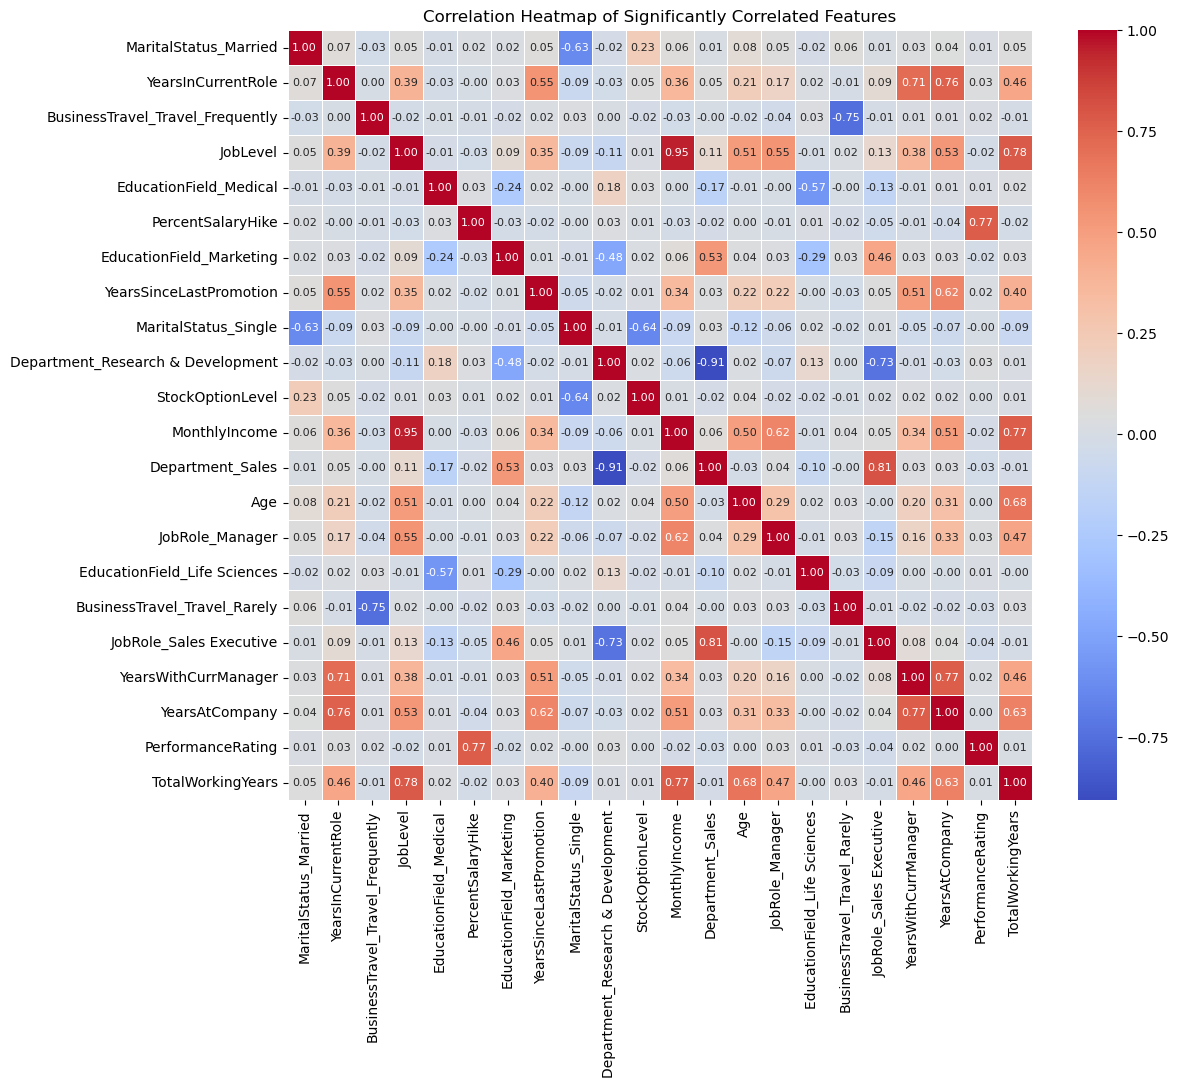

In [27]:
# Unstack the correlation matrix to get a series of correlation pairs
correlation_pairs = correlation_matrix_encoded.unstack()

# Remove self-correlations (correlation of a variable with itself)
correlation_pairs = correlation_pairs[correlation_pairs != 1]

# Filter for pairs with correlation > 0.5 or < -0.5
significant_correlations = correlation_pairs[(correlation_pairs > 0.5) | (correlation_pairs < -0.5)].sort_values(ascending=False)

# Display the significant correlations
print(significant_correlations)

# Plot a heatmap for the most significantly correlated features
significant_features = list(set(significant_correlations.index.get_level_values(0)).union(set(significant_correlations.index.get_level_values(1))))
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data_encoded[significant_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Heatmap of Significantly Correlated Features')
plt.show()

**Observations:**
- Surprisingly, **Attrition** doesn't have any strong correlation with any other variables
<br>

- **MonthlyIncome** is strongly positively correlated with Job Level, TotalWorkingYears, JobRole_Manager, Age, YearsAtCompany, all of which indicate seniority and experience. We should be able to drop one or many of these variables to reduce dimensions
<br>

- **JobRole_SalesExecutive** is strongly positively correlated with Department_Sales and EducationField_Marketing while strongly negatively correlated with Department_R&D, which emphasizes the alignment of education backgrounds, career paths, and current positions.
<br>

- Similarly, correlation between other Department, Education Field, and Job Role reflects the natural structure of the firm (Sales Exec needs to be in Sales department) and educational backgrounds supporting career path (EducationField in Medical is not likely to be associated with Department Marketing)
<br>

- **Age** is strongly positively correlated with TotalWorkingYears, MonthlyIncome, JobLevel, which makes sense as all these variables are about level of experience. We might just need a smaller subset of these variables instead of including all in the model
<br>
    
- **MaritalStatus_Single** is strongly negatively correlated with StockOptionLevel, which is not expected
<br>

- **Performance Rating** is strongly positively correlated with PercentSalaryHike, which makes perfect sense
<br>

- **YearsSinceLastPromotion** is strongly positively correlated with TotalWorkingYears, YearsInCurrentRole, YearsWithCurrentManager, YearsAtCompany and JobLevel, all of which indicate seniority. The higher the JobLevel, the more likely that an employee has been with the company for a long time, has a lot of years of experience

### 3.4. Correlation Matrix between Target variable "Attrition" and remaining variables

#### Let's look at correlation of each variable with Target variable "Attrition"

In [28]:
# Choose the target variable
target_variable = 'Attrition_Yes'

# Get the correlation values for the target variable and sort them in descending order
correlation_with_target = correlation_matrix_encoded[target_variable].sort_values(ascending=False)

# Sort the correlation values based on absolute values in descending order
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)

# Display the top correlations (both positive and negative)
top_correlations = correlation_with_target_sorted.head(20).index
top_correlation_values = correlation_with_target[top_correlations]

print(top_correlation_values)

# Plot a heatmap for the top correlated variables
#plt.figure(figsize=(10, 8))
#sns.heatmap(data_encoded[top_correlations].corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt=".2f")
#plt.title(f'Correlation Heatmap of Top Features with {target_variable}')
#plt.show()

Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                   -0.171063
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
MonthlyIncome                       -0.159840
Age                                 -0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                -0.156199
StockOptionLevel                    -0.137145
YearsAtCompany                      -0.134392
JobInvolvement                      -0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
Department_Research & Development   -0.085293
Name: Attrition_Yes, dtype: float64


**Observations:** Overall, Attrition has very low correlation with any available variables
<br>

**- Positive Correlation with Attrition_Yes:**
<br>
- OverTime_Yes (0.246118): Employees who work overtime are more likely to leave the company. This suggests that high workload or work-life imbalance might be a factor in attrition.
- MaritalStatus_Single (0.175419): Single employees are more likely to leave compared to those who are married or have other marital statuses. This might indicate that single employees have fewer personal commitments tying them to their current job.
- JobRole_Sales Representative (0.157234): Employees in the Sales Representative role are more likely to leave. This could indicate high pressure or turnover in sales positions.
- BusinessTravel_Travel_Frequently (0.115143): Employees who frequently travel for business are slightly more likely to leave. Travel demands might contribute to job dissatisfaction or burnout.
- JobRole_Laboratory Technician (0.098290): Employees in the Laboratory Technician role are slightly more likely to leave. This might indicate specific challenges or dissatisfaction in this role.
<br>

**- Negative Correlation with Attrition_Yes:**
- TotalWorkingYears (-0.171063): Employees with more years of total working experience are less likely to leave the company. This suggests that more experienced employees might have better job stability or satisfaction or because they have family obligations and thus less motivated to switch jobs
- JobLevel (-0.169105): Higher job levels are associated with lower attrition rates. Senior employees are less likely to leave, possibly due to better compensation, job satisfaction, or career fulfillment.
- YearsInCurrentRole (-0.160545): Employees who have spent more years in their current role are less likely to leave. This might indicate satisfaction with their current position or stability within their role.
- MonthlyIncome (-0.159840): Higher monthly income is associated with lower attrition rates. Better-paid employees are less likely to leave, possibly due to financial satisfaction.
- Age (-0.159205): Older employees are less likely to leave the company. Age might correlate with job stability, satisfaction, or fewer external opportunities.
- YearsWithCurrManager (-0.156199): Employees who have been with their current manager for a longer time are less likely to leave. This might indicate good managerial relationships contributing to retention.
- StockOptionLevel (-0.137145): Higher stock option levels are associated with lower attrition rates. Stock options might incentivize employees to stay longer with the company.
- YearsAtCompany (-0.134392): Employees who have been with the company for more years are less likely to leave. Longer tenure might indicate loyalty or job satisfaction.
- JobInvolvement (-0.130016): Higher job involvement is associated with lower attrition rates. Engaged employees are less likely to leave.
- JobSatisfaction (-0.103481): Higher job satisfaction is associated with lower attrition rates. Satisfied employees are less likely to leave.
- EnvironmentSatisfaction (-0.103369): Higher satisfaction with the work environment is associated with lower attrition rates. A positive work environment contributes to retention.
- MaritalStatus_Married (-0.090984): Married employees are less likely to leave compared to their single counterparts. Marital status might provide stability or additional reasons to stay.
- JobRole_Research Director (-0.088870): Employees in the Research Director role are less likely to leave. This suggests higher job satisfaction or stability in this senior role.
- Department_Research & Development (-0.085293): Employees in the Research & Development department are less likely to leave. This could indicate job satisfaction or stability within the R&D department.

### 3.5. Attrition Rate by different categories: should we bin/group values into categories?

#### By categorical variables

In [29]:
def plot_and_summarize_categorical(data, column):
    # Calculate counts
    summary_count = data.groupby([column, 'Attrition']).size().unstack().fillna(0)
    summary_count.columns = ['Stay', 'Attrition']
    
    # Calculate frequencies
    summary_freq = summary_count.div(summary_count.sum(axis=1), axis=0)
    summary_freq.columns = ['Stay Frequency', 'Attrition Frequency']
    
    # Consolidate count and frequency into one table
    summary_combined = pd.concat([summary_count, summary_freq], axis=1)

    # Plot counts
    plt.figure(figsize=(10, 3))
    sns.countplot(data=data, x=column, hue='Attrition', palette=['cyan', 'pink'])
    plt.xticks(rotation=45)
    plt.title(f'{column} Distribution by Attrition Status')
    plt.show()
    
    return summary_combined

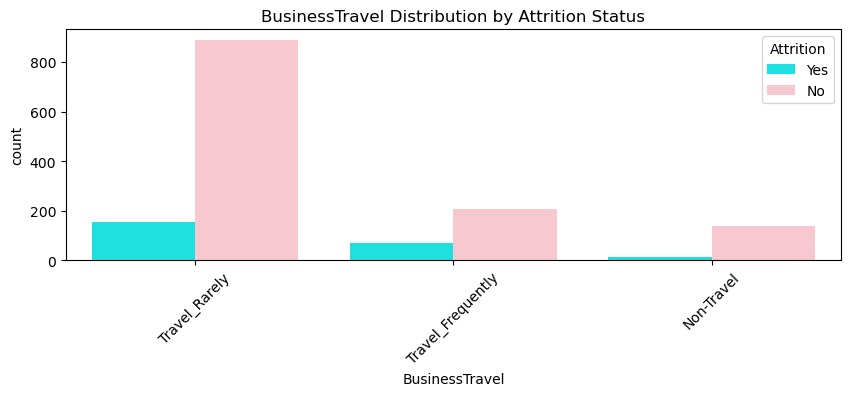


Summary for BusinessTravel (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
BusinessTravel                                                         
Non-Travel          138         12        0.920000             0.080000
Travel_Frequently   208         69        0.750903             0.249097
Travel_Rarely       887        156        0.850431             0.149569

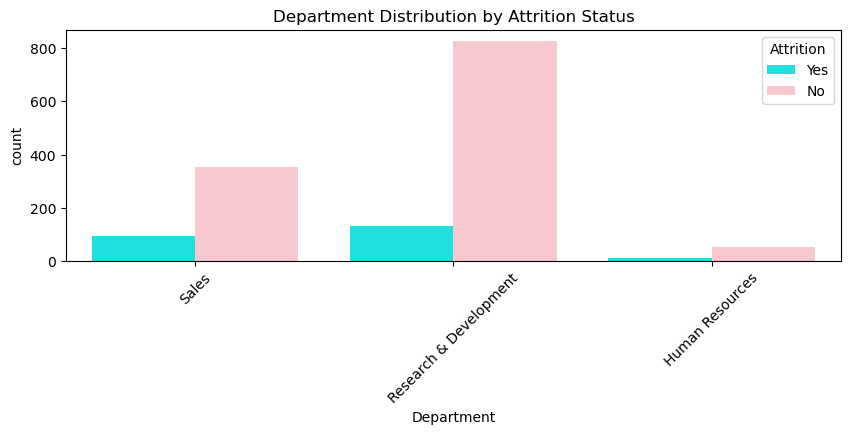


Summary for Department (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
Department                                                                  
Human Resources           51         12        0.809524             0.190476
Research & Development   828        133        0.861602             0.138398
Sales                    354         92        0.793722             0.206278

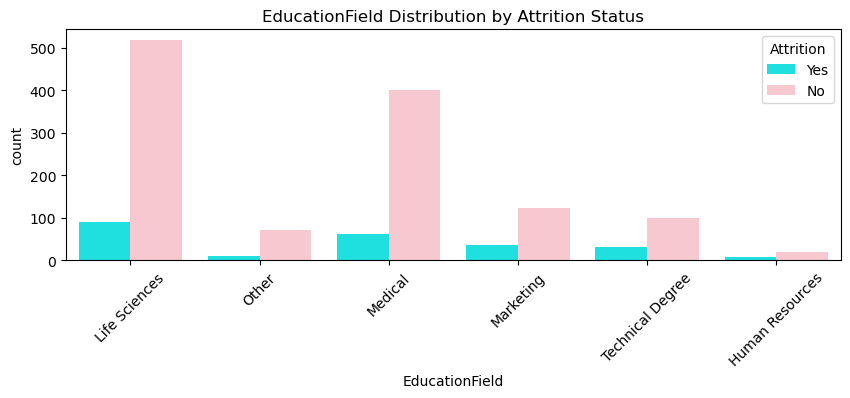


Summary for EducationField (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
EducationField                                                        
Human Resources     20          7        0.740741             0.259259
Life Sciences      517         89        0.853135             0.146865
Marketing          124         35        0.779874             0.220126
Medical            401         63        0.864224             0.135776
Other               71         11        0.865854             0.134146
Technical Degree   100         32        0.757576             0.242424

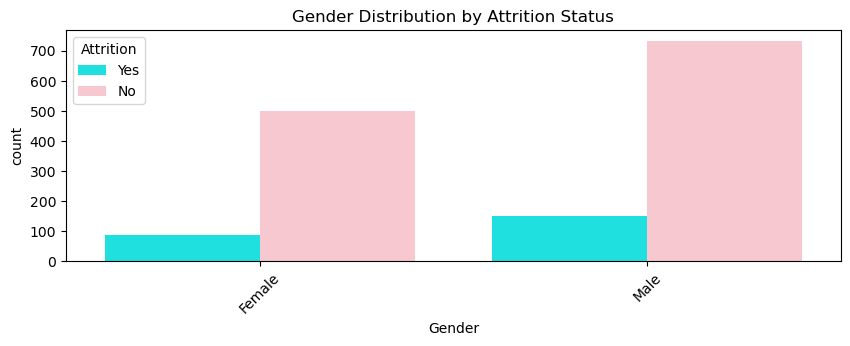


Summary for Gender (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
Gender                                                      
Female   501         87        0.852041             0.147959
Male     732        150        0.829932             0.170068

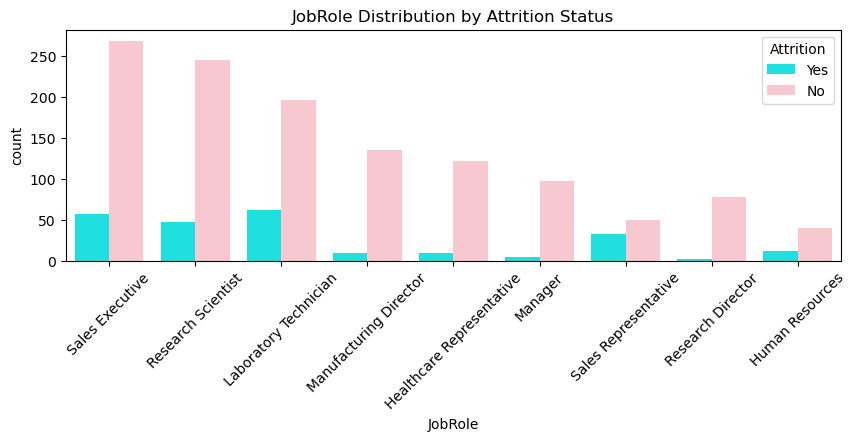


Summary for JobRole (Count and Frequency):


Stay  Attrition  Stay Frequency  \
JobRole                                                      
Healthcare Representative   122          9        0.931298   
Human Resources              40         12        0.769231   
Laboratory Technician       197         62        0.760618   
Manager                      97          5        0.950980   
Manufacturing Director      135         10        0.931034   
Research Director            78          2        0.975000   
Research Scientist          245         47        0.839041   
Sales Executive             269         57        0.825153   
Sales Representative         50         33        0.602410   

                           Attrition Frequency  
JobRole                                         
Healthcare Representative             0.068702  
Human Resources                       0.230769  
Laboratory Technician                 0.239382  
Manager                               0.049020  
Manufacturing Director                0.068966  
Research Director                     0.025000  
Research Scientist                    0.160959  
Sales Executive                       0.174847  
Sales Representative                  0.397590

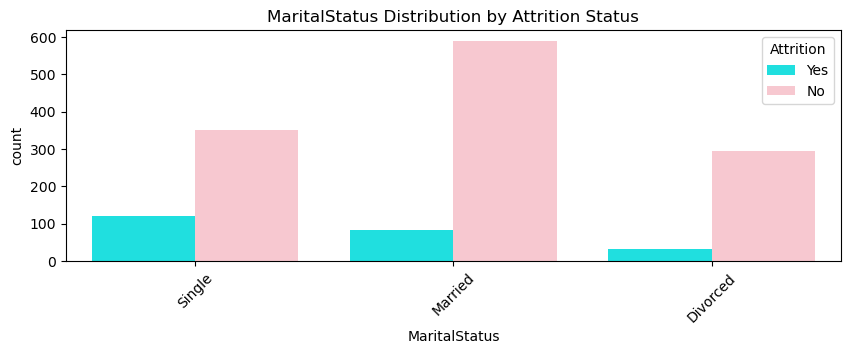


Summary for MaritalStatus (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
MaritalStatus                                                      
Divorced        294         33        0.899083             0.100917
Married         589         84        0.875186             0.124814
Single          350        120        0.744681             0.255319

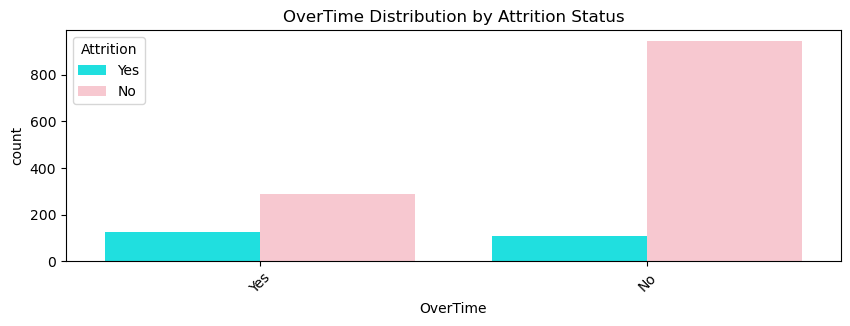


Summary for OverTime (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
OverTime                                                      
No         944        110        0.895636             0.104364
Yes        289        127        0.694712             0.305288

In [30]:
# Exclude "Attrition" from the categorical_features list
categorical_features = [feature for feature in categorical_features if feature != "Attrition"]

# Plot and summarize each categorical variable
summaries = {}
for var in categorical_features:
    summary_combined = plot_and_summarize_categorical(data, var)
    summaries[var] = summary_combined
    print(f"\nSummary for {var} (Count and Frequency):")
    display(summary_combined)

**Observations:**
- 'OverTime' shows significant differences in attrition rates, indicating its importance. We could test interactions with other variables.
<br>

- 'BusinessTravel' shows significant differences in attrition rates, indicating its importance. We could test interactions with other variables.
<br>

- 'Department' feature shows varied attrition rates: HR and Sales seem to have similar attrition rate while R&D attrition rate is significantly lower. We could test interactions with other variables.
<br>

- 'EducationField' can be grouped into 2 buckets: High Attrition (> 20%) includes HR, Technical Degree, Marketing and Low Attrition (< 20%) includes Life Science, Medical, Others.
<br>

- 'Gender' has a slight difference in attrition rate, although it has extremely low correlation with target var
<br>

- 'JobRole' can be grouped into 3 categories based on their attrition rates
    - High Attrition (> 30%): Sales Representative
    - Medium Attrition (> 15% and =< 30%): Human Resources, Laboratory Technician, Research Scientist, Sales Executive
    - Low Attrition (<= 15%): Healthcare Representative, Manager, Manufacturing Director, Research Director

<br>

- 'MaritalStatus' can be grouped into 2 categories based on their attrition rates: Single, Non_Single, or just leave as is

#### By ordinal variables

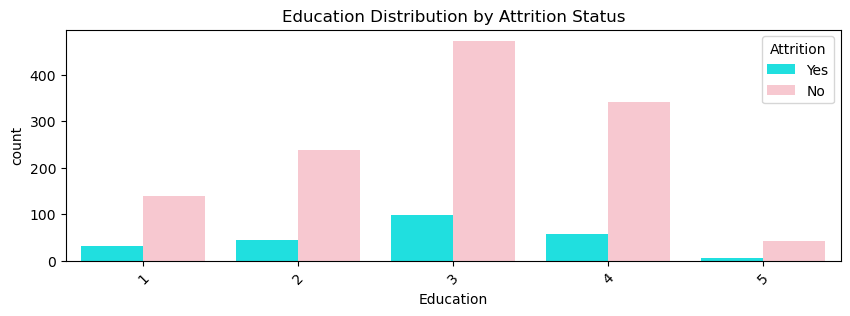


Summary for Education (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
Education                                                      
1           139         31        0.817647             0.182353
2           238         44        0.843972             0.156028
3           473         99        0.826923             0.173077
4           340         58        0.854271             0.145729
5            43          5        0.895833             0.104167

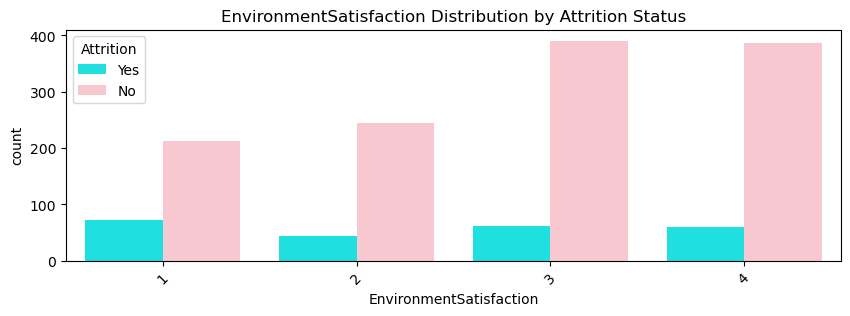


Summary for EnvironmentSatisfaction (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
EnvironmentSatisfaction                                                      
1                         212         72        0.746479             0.253521
2                         244         43        0.850174             0.149826
3                         391         62        0.863135             0.136865
4                         386         60        0.865471             0.134529

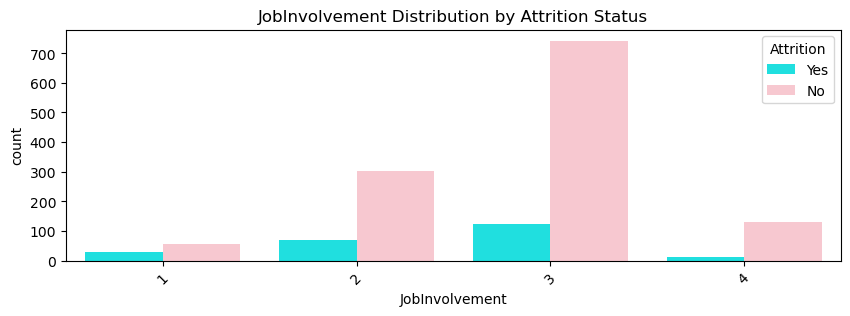


Summary for JobInvolvement (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
JobInvolvement                                                      
1                 55         28        0.662651             0.337349
2                304         71        0.810667             0.189333
3                743        125        0.855991             0.144009
4                131         13        0.909722             0.090278

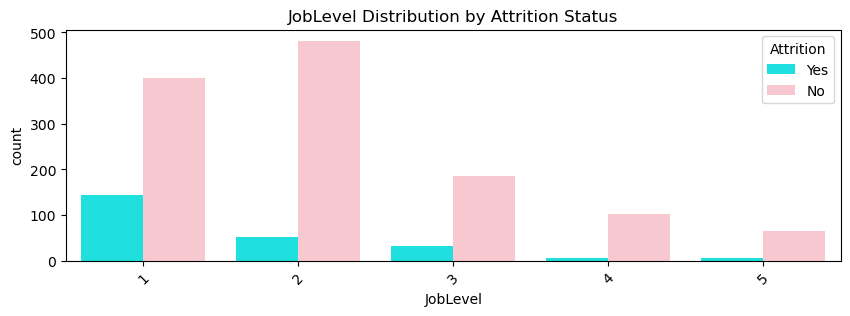


Summary for JobLevel (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
JobLevel                                                      
1          400        143        0.736648             0.263352
2          482         52        0.902622             0.097378
3          186         32        0.853211             0.146789
4          101          5        0.952830             0.047170
5           64          5        0.927536             0.072464

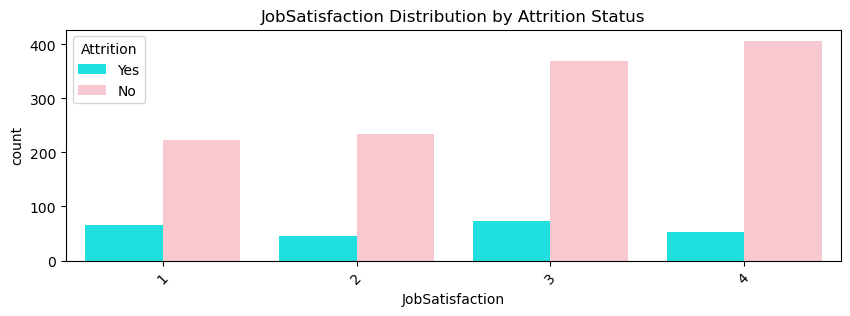


Summary for JobSatisfaction (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
JobSatisfaction                                                      
1                 223         66        0.771626             0.228374
2                 234         46        0.835714             0.164286
3                 369         73        0.834842             0.165158
4                 407         52        0.886710             0.113290

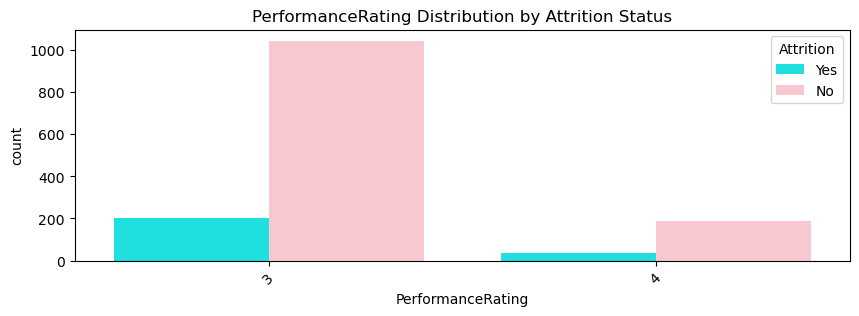


Summary for PerformanceRating (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
PerformanceRating                                                      
3                  1044        200        0.839228             0.160772
4                   189         37        0.836283             0.163717

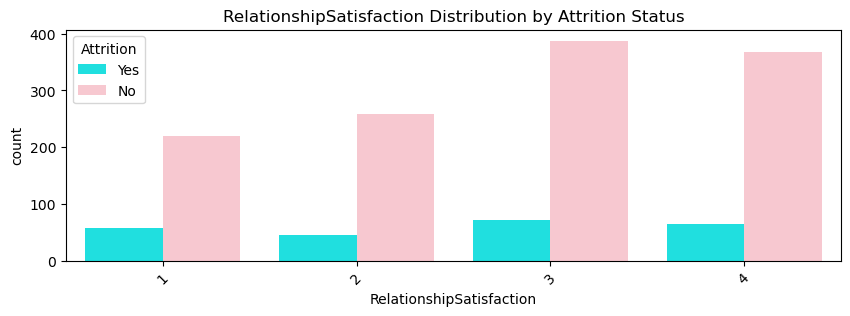


Summary for RelationshipSatisfaction (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
RelationshipSatisfaction                                                      
1                          219         57        0.793478             0.206522
2                          258         45        0.851485             0.148515
3                          388         71        0.845316             0.154684
4                          368         64        0.851852             0.148148

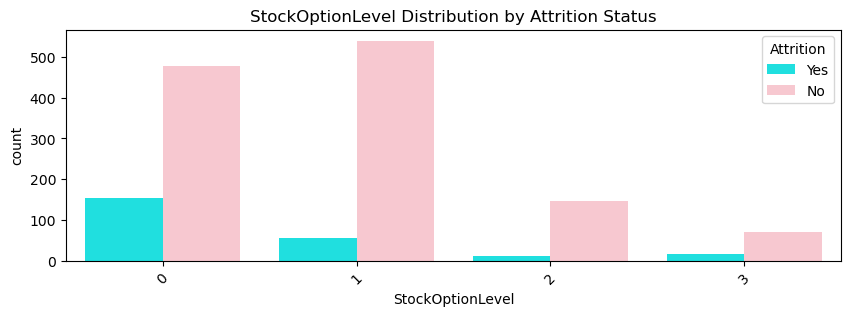


Summary for StockOptionLevel (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
StockOptionLevel                                                      
0                  477        154        0.755943             0.244057
1                  540         56        0.906040             0.093960
2                  146         12        0.924051             0.075949
3                   70         15        0.823529             0.176471

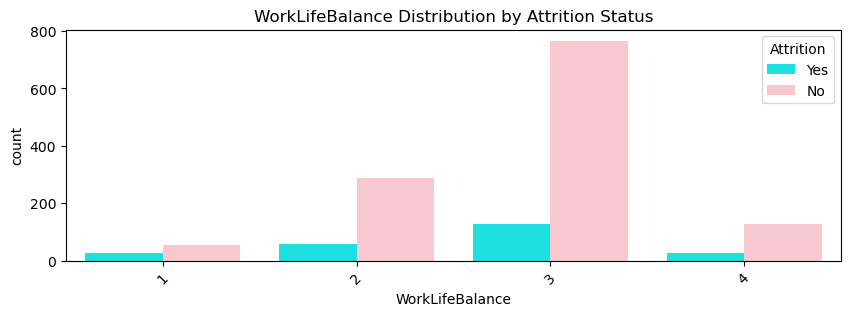


Summary for WorkLifeBalance (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
WorkLifeBalance                                                      
1                  55         25        0.687500             0.312500
2                 286         58        0.831395             0.168605
3                 766        127        0.857783             0.142217
4                 126         27        0.823529             0.176471

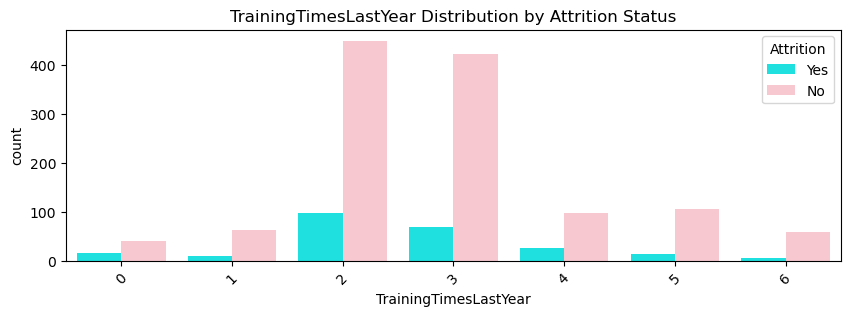


Summary for TrainingTimesLastYear (Count and Frequency):


Stay  Attrition  Stay Frequency  Attrition Frequency
TrainingTimesLastYear                                                      
0                        39         15        0.722222             0.277778
1                        62          9        0.873239             0.126761
2                       449         98        0.820841             0.179159
3                       422         69        0.859470             0.140530
4                        97         26        0.788618             0.211382
5                       105         14        0.882353             0.117647
6                        59          6        0.907692             0.092308

In [31]:
# Plot and summarize each ordinal variable
summaries_ordinal = {}
for var in ordinal_features:
    summary_combined = plot_and_summarize_categorical(data, var)
    summaries_ordinal[var] = summary_combined
    print(f"\nSummary for {var} (Count and Frequency):")
    display(summary_combined)

**Observations:**
- 'Education' could be grouped into 2 categories
    - High Attrition: levels 1, 2, and 3 (Attrition rates: 18.24%, 15.60%, and 17.31%)
    - Low Attrition: levels 4 and 5 (Attrition rates: 14.57% and 10.42%)
    
<br>

- 'PerformanceRating' doesn't seem to have material different Attrition rates between level 3 and level 4
<br>

- 'TrainingTimesLastYear' can be grouped into 2 categories: Between 0 and 4 training, and More than 4 trainings
<br>

- 'WorkLifeBalance', 'StockOptionLevel', 'RelationshipSatisfaction', 'JobSatisfaction', 'JobLevel', 'JobInvolvement', 'EnvironmentSatisfaction' all have attrition rate for level 1 (lowest rating) being significantly higher than the rest of rating, meaning that employees with rating of 1 for any category are more likely to leave. While attrition rates amongst employees with rating above 1 vary, they are generally much less likely to leave compared to employees giving rating of 1.
<br>

- We can take the average of all Satisfaction scores to represent consolidated Satisfaction Level


#### By numerical variables

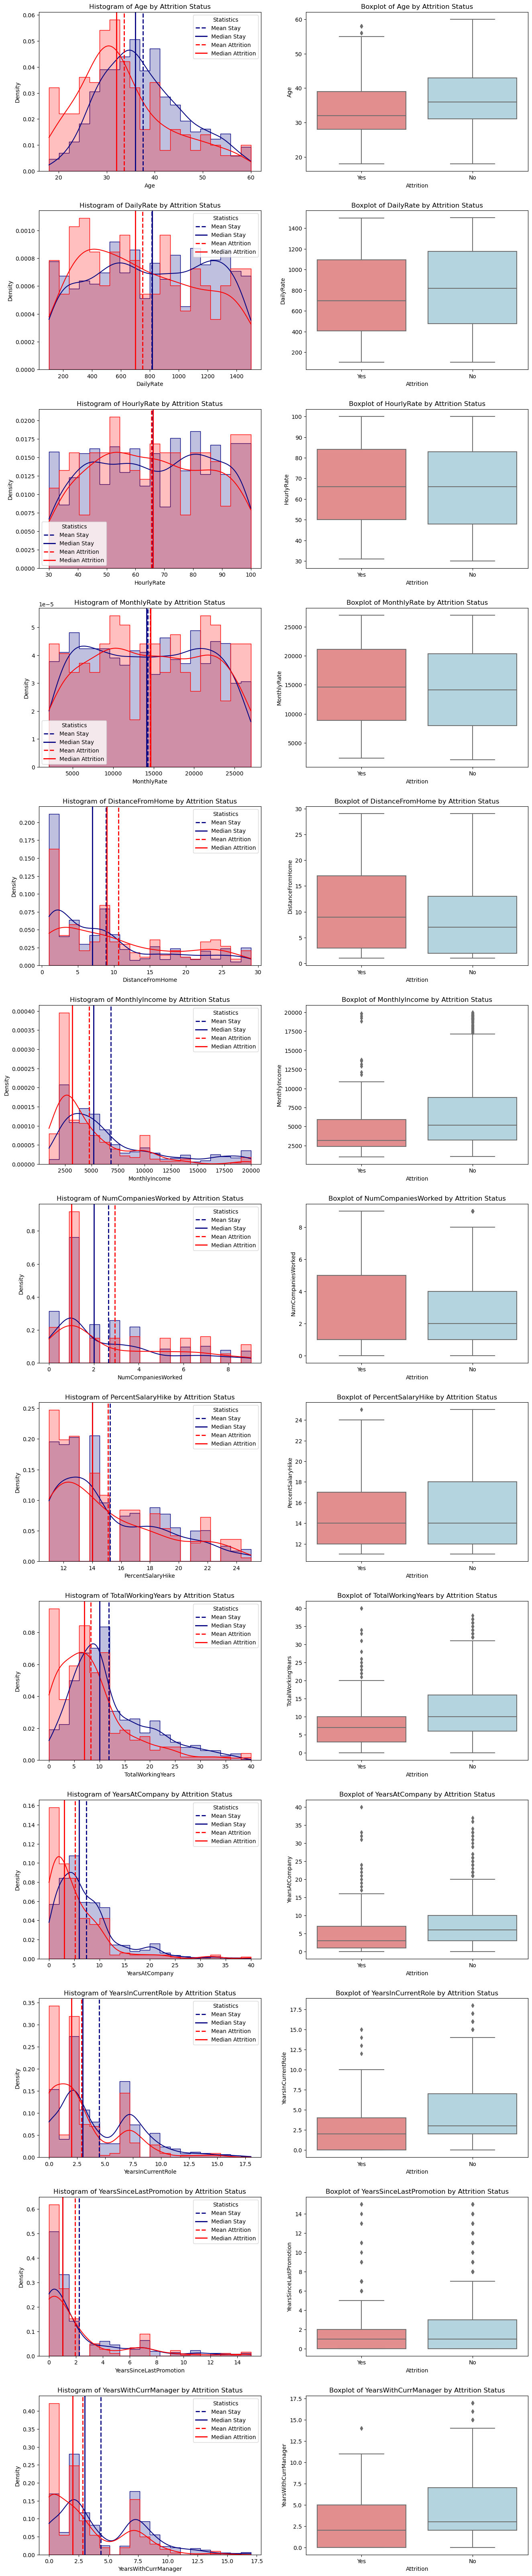

In [32]:
def plot_histograms_and_boxplots(data, numerical_cols, attrition_col='Attrition'):
    n_cols = 2  # Number of columns for subplots
    n_rows = len(numerical_cols)  # One row for each numerical column
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
    fig.tight_layout(pad=5.0)
    
    hist_colors = {'No': 'navy', 'Yes': 'red'}
    boxplot_colors = {'No': 'lightblue', 'Yes': 'lightcoral'}
    
    for i, col in enumerate(numerical_cols):
        ax_hist = axes[i, 0]
        ax_box = axes[i, 1]
        
        # Plot histogram with KDE
        sns.histplot(data=data, x=col, hue=attrition_col, element='step', stat='density', common_norm=False, bins=20, palette=hist_colors, kde=True, ax=ax_hist)
        
        # Calculate mean and median
        mean_stay = data[data[attrition_col] == 'No'][col].mean()
        median_stay = data[data[attrition_col] == 'No'][col].median()
        mean_attrition = data[data[attrition_col] == 'Yes'][col].mean()
        median_attrition = data[data[attrition_col] == 'Yes'][col].median()
        
        # Plot mean and median lines on histogram
        ax_hist.axvline(mean_stay, color=hist_colors['No'], linestyle='dashed', linewidth=2, label='Mean Stay')
        ax_hist.axvline(median_stay, color=hist_colors['No'], linestyle='solid', linewidth=2, label='Median Stay')
        ax_hist.axvline(mean_attrition, color=hist_colors['Yes'], linestyle='dashed', linewidth=2, label='Mean Attrition')
        ax_hist.axvline(median_attrition, color=hist_colors['Yes'], linestyle='solid', linewidth=2, label='Median Attrition')
        
        # Titles and labels for histogram
        ax_hist.set_title(f'Histogram of {col} by Attrition Status')
        ax_hist.set_xlabel(col)
        ax_hist.set_ylabel('Density')
        
        # Manually add legend to histogram
        handles, labels = ax_hist.get_legend_handles_labels()
        new_labels = ['Mean Stay', 'Median Stay', 'Mean Attrition', 'Median Attrition']
        ax_hist.legend(handles=handles[:4], labels=new_labels, title='Statistics')
        
        # Plot boxplot
        sns.boxplot(data=data, x=attrition_col, y=col, palette=boxplot_colors, ax=ax_box)
        
        # Titles and labels for boxplot
        ax_box.set_title(f'Boxplot of {col} by Attrition Status')
        ax_box.set_xlabel('Attrition')
        ax_box.set_ylabel(col)
    
    plt.show()

# Call the function
plot_histograms_and_boxplots(data, numerical_features)

**Observations:**

- Attrition group tends to be younger than Stay group
- Attrition group tends to have higher DistanceFromHome than Stay group
- Attrition group tends to have lower MonthlyIncome than Stay group
- Attrition group tends to have a wider IQR of NumCompaniesWorked than Stay group
- Attrition group tends to have lower PercentSalaryHike than Stay group
- Attrition group tends to have lower TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager than Stay group


**Observations:**
- **Age** can be binned into 3 groups: <= 30, (>30 and <= 40), and >40

- **DistanceFromHome** can be binned into 2 groups: <= 10 and > 10

- **MonthlyIncome** can be binned into 3 groups: <= 4000, (>4000 and <= 11000), and >11000

- **NumCompaniesWorked** can be binned into 2 groups: <= 4 and > 4

- **YearsAtCompany** can be binned into 3 groups: <= 5, (>5 and <= 20), and >20

- Average Time at each firm can be calculated by taking TotalWorkingYears divided by NumCompaniesWorked

### IV. Preliminary Models to assess Feature Importance

**1. Random Forest Classifier**:
<br>
- A robust ensemble method that combines multiple decision trees to improve predictive performance and robustness. It provides feature importance scores based on the average impurity decrease across all trees.
- Implementation: sklearn.ensemble.RandomForestClassifier
<br>

**2. Gradient Boosting Classifier**
- An ensemble method that builds trees sequentially, where each tree tries to correct the errors of the previous ones. XGBoost is known for its efficiency and performance.
- Implementation: xgboost.XGBClassifier
<br>

**3. Logistic Regression with L1 Regularization (Lasso)**
- A linear model for binary classification that uses L1 regularization to perform feature selection by driving the coefficients of less important features to zero.
- Implementation: sklearn.linear_model.LogisticRegression with penalty='l1' and solver='liblinear'

In [33]:
#data_encoded.info()

In [34]:
#pip install xgboost

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve

In [36]:
# Prepare the data
X = data.drop(columns=['Attrition'])
y = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_
rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_
xgb_predictions = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Logistic Regression with L1 Regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_model.fit(X_train_scaled, y_train)
logreg_importances = np.abs(logreg_model.coef_[0])
logreg_predictions = logreg_model.predict(X_test_scaled)
logreg_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Combine feature importances into a DataFrame for comparison
feature_names = X.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'LogisticRegression_L1': logreg_importances
})

C:\Users\Eliza Bui\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:06:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [38]:
# Sort by RandomForest importance
importances_df = importances_df.sort_values(by='RandomForest', ascending=False)
display(importances_df)

Feature  RandomForest   XGBoost  \
9                       MonthlyIncome      0.079447  0.033754   
43                       OverTime_Yes      0.058897  0.077880   
0                                 Age      0.056085  0.021500   
1                           DailyRate      0.051504  0.017159   
10                        MonthlyRate      0.048895  0.015314   
16                  TotalWorkingYears      0.048578  0.030803   
2                    DistanceFromHome      0.042809  0.019031   
5                          HourlyRate      0.041754  0.016312   
19                     YearsAtCompany      0.041551  0.034083   
11                 NumCompaniesWorked      0.037947  0.027787   
15                   StockOptionLevel      0.035863  0.042914   
12                  PercentSalaryHike      0.035786  0.011714   
22               YearsWithCurrManager      0.031138  0.019318   
21            YearsSinceLastPromotion      0.028314  0.030777   
8                     JobSatisfaction      0.027273  0.026049   
20                 YearsInCurrentRole      0.026415  0.027478   
7                            JobLevel      0.024644  0.055565   
4             EnvironmentSatisfaction      0.024528  0.023597   
17              TrainingTimesLastYear      0.023972  0.014751   
14           RelationshipSatisfaction      0.022190  0.013696   
18                    WorkLifeBalance      0.021916  0.023029   
6                      JobInvolvement      0.021021  0.030657   
3                           Education      0.018387  0.020879   
42               MaritalStatus_Single      0.015758  0.062748   
23   BusinessTravel_Travel_Frequently      0.013594  0.027949   
40       JobRole_Sales Representative      0.010238  0.015980   
41              MaritalStatus_Married      0.009830  0.010988   
26                   Department_Sales      0.008958  0.043816   
39            JobRole_Sales Executive      0.008855  0.039957   
32                        Gender_Male      0.008606  0.012290   
29             EducationField_Medical      0.008215  0.019479   
25  Department_Research & Development      0.007895  0.009285   
31    EducationField_Technical Degree      0.007857  0.024862   
27       EducationField_Life Sciences      0.007665  0.015561   
24       BusinessTravel_Travel_Rarely      0.007656  0.015904   
38         JobRole_Research Scientist      0.006750  0.022709   
34      JobRole_Laboratory Technician      0.006626  0.012795   
13                  PerformanceRating      0.005860  0.000000   
28           EducationField_Marketing      0.005510  0.007375   
33            JobRole_Human Resources      0.003850  0.024254   
30               EducationField_Other      0.003475  0.000000   
36     JobRole_Manufacturing Director      0.001817  0.000000   
35                    JobRole_Manager      0.001732  0.000000   
37          JobRole_Research Director      0.000338  0.000000   

    LogisticRegression_L1  
9                0.000000  
43               0.951228  
0                0.234404  
1                0.104781  
10               0.079777  
16               0.428244  
2                0.318999  
5                0.024476  
19               0.597133  
11               0.493311  
15               0.163375  
12               0.048526  
22               0.426352  
21               0.481811  
8                0.418491  
20               0.600988  
7                0.000000  
4                0.395064  
17               0.194124  
14               0.155909  
18               0.240922  
6                0.330184  
3                0.055555  
42               0.593116  
23               0.667349  
40               0.398788  
41               0.179882  
26               0.298843  
39               0.226764  
32               0.204151  
29               0.114544  
25               0.000000  
31               0.198143  
27               0.135024  
24               0.393205  
38               0.298808  
34               0.674139  
13               0.015850  
28          

In [39]:
# Sort and get the top 10 features for each model
top_rf = importances_df[['Feature', 'RandomForest']].sort_values(by='RandomForest', ascending=False).head(10)
top_xgb = importances_df[['Feature', 'XGBoost']].sort_values(by='XGBoost', ascending=False).head(10)
top_logreg = importances_df[['Feature', 'LogisticRegression_L1']].sort_values(by='LogisticRegression_L1', ascending=False).head(10)

print("Top 10 Features for Random Forest:")
display(top_rf)
print("\nTop 10 Features for XGBoost:")
display(top_xgb)
print("\nTop 10 Features for Logistic Regression with L1 Regularization:")
display(top_logreg)

Top 10 Features for Random Forest:


Feature  RandomForest
9        MonthlyIncome      0.079447
43        OverTime_Yes      0.058897
0                  Age      0.056085
1            DailyRate      0.051504
10         MonthlyRate      0.048895
16   TotalWorkingYears      0.048578
2     DistanceFromHome      0.042809
5           HourlyRate      0.041754
19      YearsAtCompany      0.041551
11  NumCompaniesWorked      0.037947


Top 10 Features for XGBoost:


Feature   XGBoost
43             OverTime_Yes  0.077880
42     MaritalStatus_Single  0.062748
7                  JobLevel  0.055565
26         Department_Sales  0.043816
15         StockOptionLevel  0.042914
39  JobRole_Sales Executive  0.039957
19           YearsAtCompany  0.034083
9             MonthlyIncome  0.033754
16        TotalWorkingYears  0.030803
21  YearsSinceLastPromotion  0.030777


Top 10 Features for Logistic Regression with L1 Regularization:


Feature  LogisticRegression_L1
43                      OverTime_Yes               0.951228
34     JobRole_Laboratory Technician               0.674139
23  BusinessTravel_Travel_Frequently               0.667349
20                YearsInCurrentRole               0.600988
19                    YearsAtCompany               0.597133
42              MaritalStatus_Single               0.593116
11                NumCompaniesWorked               0.493311
21           YearsSinceLastPromotion               0.481811
16                 TotalWorkingYears               0.428244
22              YearsWithCurrManager               0.426352

In [40]:
# Find the intersection of the top 10 features for all three models
common_features = set(top_rf['Feature']).intersection(set(top_xgb['Feature'])).intersection(set(top_logreg['Feature']))
print("\nFeatures common in top 10 of all 3 models:")
print(common_features)


Features common in top 10 of all 3 models:
{'OverTime_Yes', 'YearsAtCompany', 'TotalWorkingYears'}


**Observations:**
<br>
- OverTime_Yes, 'YearsAtCompany', 'TotalWorkingYears' : are highly important in all three models
- MonthlyIncome: Important in both Random Forest and XGBoost but not selected by Logistic Regression with L1 Regularization
- Surpringly, all 3 rates: HourlyRate, DailyRate, Monthly Rate are considered important in Random Forest although they don't communicate much info beyond MonthlyIncome as explored above
- JobRole_Sales Executive is an important feature in XGBoost while JobRole_Laboratory Technician is an important feature in Logistic L1	

### Let's look at prediction performance of 3 models

**Reminder of goal: We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 83.90%**

In [41]:
# Calculate performance metrics
def calculate_metrics(y_true, y_pred, y_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_probs)
    return accuracy, precision, recall, f1, auc

rf_metrics = calculate_metrics(y_test, rf_predictions, rf_probs)
xgb_metrics = calculate_metrics(y_test, xgb_predictions, xgb_probs)
logreg_metrics = calculate_metrics(y_test, logreg_predictions, logreg_probs)

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'RandomForest': rf_metrics,
    'XGBoost': xgb_metrics,
    'LogisticRegression_L1': logreg_metrics
})

display(metrics_df)

Metric  RandomForest   XGBoost  LogisticRegression_L1
0   Accuracy      0.877551  0.877551               0.894558
1  Precision      0.800000  0.588235               0.633333
2     Recall      0.102564  0.256410               0.487179
3   F1 Score      0.181818  0.357143               0.550725
4    AUC-ROC      0.752589  0.748919               0.794872

**Observations:**
<br>
- **Accuracy**: All models have similar accuracy, with Logistic Regression slightly higher at 89.5%. This is better than the random guess threshold of 83.90%

- **Logistic Regression** with L1 Regularization shows the best overall performance, particularly in accuracy, recall, F1 score, and AUC-ROC.

- **Random Forest** excels in precision but performs poorly in recall and F1 score.

- **XGBoost** has moderate performance across all metrics but does not outperform Logistic Regression.

#### Confusion Matrix

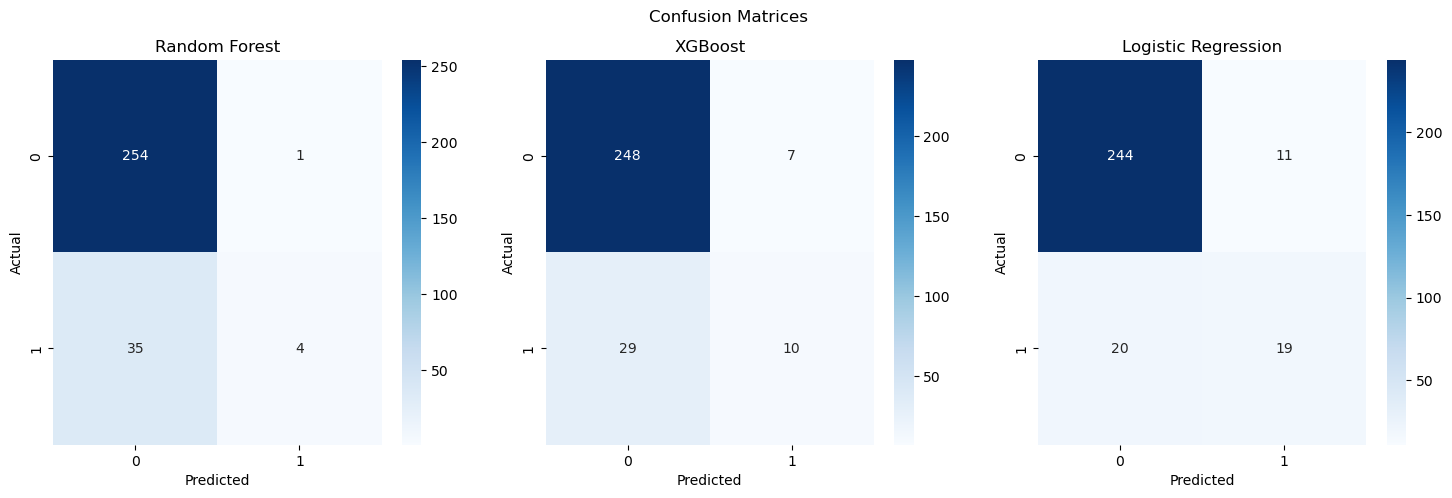

In [42]:
# Calculate confusion matrices
rf_cm = confusion_matrix(y_test, rf_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
logreg_cm = confusion_matrix(y_test, logreg_predictions)

# Plot confusion matrices manually
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices')

sns.heatmap(rf_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(xgb_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('XGBoost')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(logreg_cm, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Logistic Regression')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

#### Precision-Recall Curves

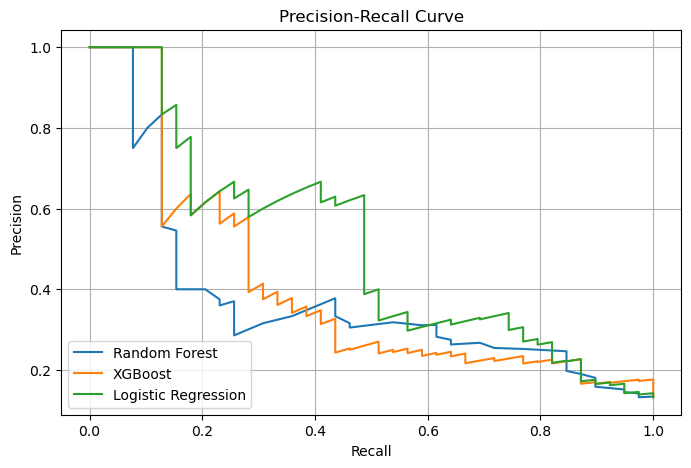

In [43]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curves
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)

# Plot Precision-Recall curves
plt.figure(figsize=(8, 5))

plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.plot(xgb_recall, xgb_precision, label='XGBoost')
plt.plot(logreg_recall, logreg_precision, label='Logistic Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### ROC Curves

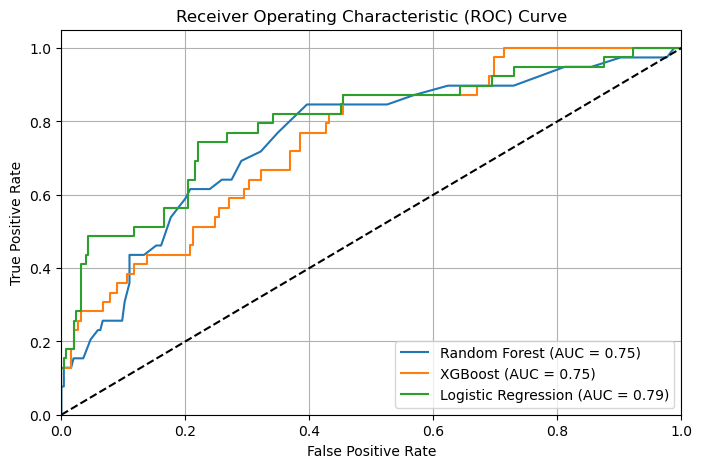

In [44]:
# Calculate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Calculate AUC-ROC
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

# Plot ROC curves
plt.figure(figsize=(8, 5))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Feature Count  Accuracy  Precision    Recall  F1 Score
0             10  0.840136   0.318182  0.179487  0.229508
1             15  0.846939   0.375000  0.230769  0.285714
2             20  0.870748   0.520000  0.333333  0.406250
3             25  0.880952   0.583333  0.358974  0.444444
4             30  0.887755   0.615385  0.410256  0.492308

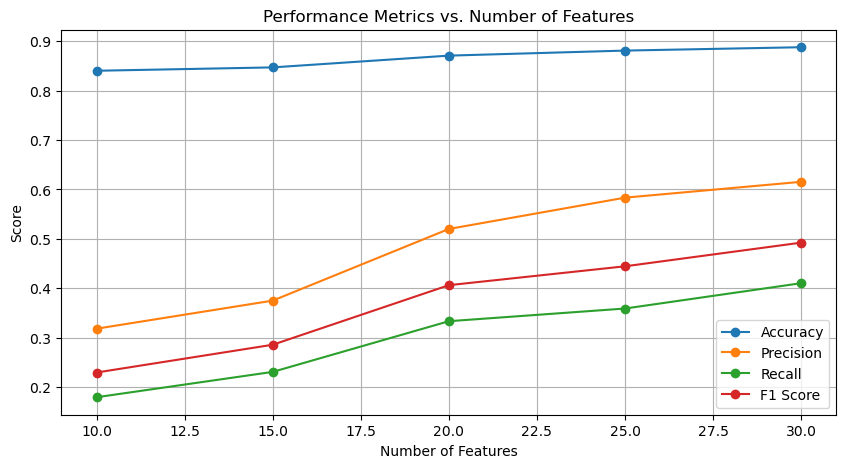

In [45]:
# Extract and rank coefficients by absolute importance
coefficients = np.abs(logreg_model.coef_[0])
sorted_indices = np.argsort(coefficients)[::-1]  # Sort in descending order

# Function to evaluate performance for different feature counts
def evaluate_feature_counts(X_train, y_train, X_test, y_test, sorted_indices, counts):
    results = []
    for count in counts:
        # Select top 'count' features
        selected_indices = sorted_indices[:count]
        X_train_selected = X_train[:, selected_indices]
        X_test_selected = X_test[:, selected_indices]

        # Train logistic regression on selected features
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
        model.fit(X_train_selected, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Append results
        results.append((count, accuracy, precision, recall, f1))
    
    return pd.DataFrame(results, columns=['Feature Count', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Evaluate for feature counts of 15, 20, and 25
feature_counts = [10, 15, 20, 25, 30]
performance_df = evaluate_feature_counts(X_train_scaled, y_train, X_test_scaled, y_test, sorted_indices, feature_counts)

# Display results
display(performance_df)

# Plotting the performance metrics
plt.figure(figsize=(10, 5))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(performance_df['Feature Count'], performance_df[metric], marker='o', label=metric)

plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

### V. Feature Engineering to improve model performance: Transform features

### 5.1. Binning and Combination

In [46]:
# Copy data to a new df to perform feature engineering
data2 = data

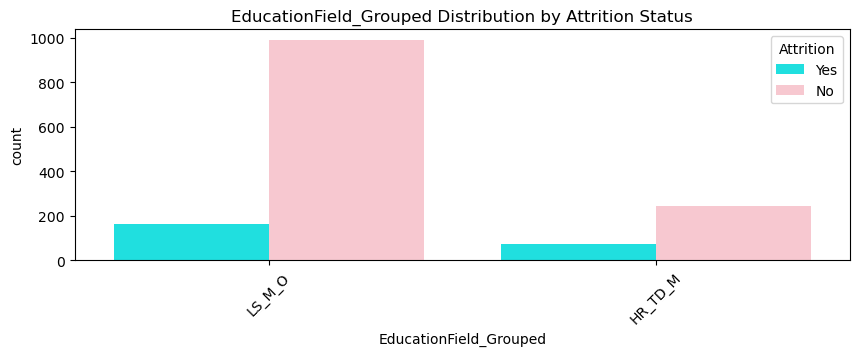

Stay  Attrition  Stay Frequency  Attrition Frequency
EducationField_Grouped                                                      
HR_TD_M                  244         74        0.767296             0.232704
LS_M_O                   989        163        0.858507             0.141493

In [47]:
# Define high attrition and low attrition fields with custom labels
high_attrition_fields = ['Human Resources', 'Technical Degree', 'Marketing']
low_attrition_fields = ['Life Sciences', 'Medical', 'Other']

# Function to group EducationField into custom categories
def group_education_field(df):
    df['EducationField_Grouped'] = df['EducationField'].apply(
        lambda x: 'HR_TD_M' if x in high_attrition_fields else 'LS_M_O'
    )
    return df

# Apply the function to the dataframe
data2 = group_education_field(data2)

# Call the function to plot and summarize
summary_EducationField_Grouped = plot_and_summarize_categorical(data2, 'EducationField_Grouped')

# Display the summary table
display(summary_EducationField_Grouped)

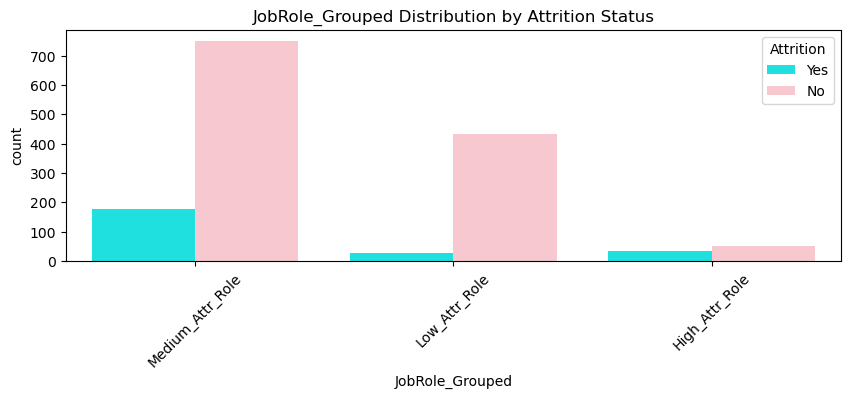

Stay  Attrition  Stay Frequency  Attrition Frequency
JobRole_Grouped                                                       
High_Attr_Role      50         33        0.602410             0.397590
Low_Attr_Role      432         26        0.943231             0.056769
Medium_Attr_Role   751        178        0.808396             0.191604

In [48]:
# Define job roles based on attrition rates
high_attrition_roles = ['Sales Representative']
medium_attrition_roles = ['Human Resources', 'Laboratory Technician', 'Research Scientist', 'Sales Executive']
low_attrition_roles = ['Healthcare Representative', 'Manager', 'Manufacturing Director', 'Research Director']

# Function to group JobRole into custom categories
def group_job_role(df):
    def categorize_job_role(role):
        if role in high_attrition_roles:
            return 'High_Attr_Role'
        elif role in medium_attrition_roles:
            return 'Medium_Attr_Role'
        elif role in low_attrition_roles:
            return 'Low_Attr_Role'
        else:
            return 'Unknown'
    
    df['JobRole_Grouped'] = df['JobRole'].apply(categorize_job_role)
    return df

# Apply the function to the dataframe
data2 = group_job_role(data2)

# Call the function to plot and summarize
summary_JobRole_Grouped = plot_and_summarize_categorical(data2, 'JobRole_Grouped')

# Display the summary table
display(summary_JobRole_Grouped)

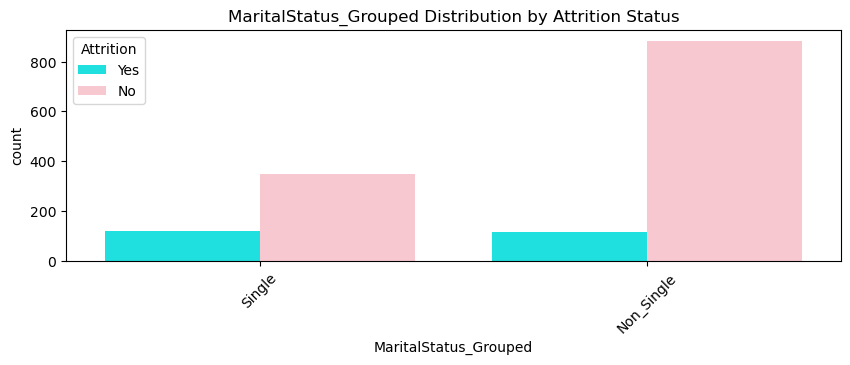

Stay  Attrition  Stay Frequency  Attrition Frequency
MaritalStatus_Grouped                                                      
Non_Single              883        117        0.883000             0.117000
Single                  350        120        0.744681             0.255319

In [49]:
# Define marital status categories based on attrition rates
single_status = ['Single']
non_single_status = ['Married', 'Divorced']

# Function to group MaritalStatus into custom categories
def group_marital_status(df):
    df['MaritalStatus_Grouped'] = df['MaritalStatus'].apply(
        lambda x: 'Single' if x in single_status else 'Non_Single'
    )
    return df

# Apply the function to the dataframe
data2 = group_marital_status(data2)

# Call the function to plot and summarize
summary_MaritalStatus_Grouped = plot_and_summarize_categorical(data2, 'MaritalStatus_Grouped')

# Display the summary table
display(summary_MaritalStatus_Grouped)

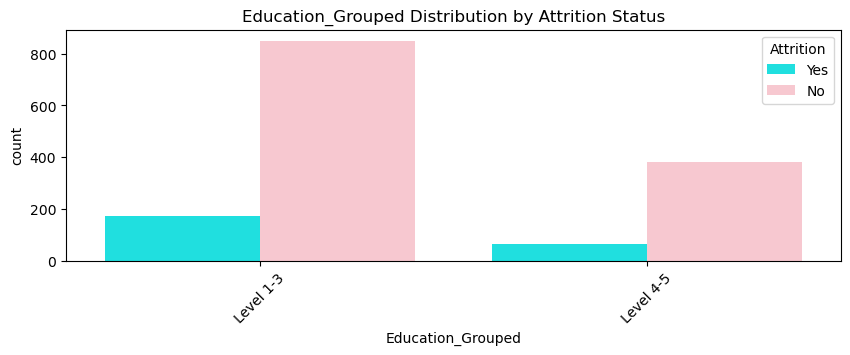

Stay  Attrition  Stay Frequency  Attrition Frequency
Education_Grouped                                                      
Level 1-3           850        174        0.830078             0.169922
Level 4-5           383         63        0.858744             0.141256

In [50]:
# Define education categories
low_education_levels = [1, 2, 3]
high_education_levels = [4, 5]

# Function to group Education into custom categories
def group_education(df):
    df['Education_Grouped'] = df['Education'].apply(
        lambda x: 'Level 1-3' if x in low_education_levels else 'Level 4-5'
    )
    return df

# Apply the function to the dataframe
data2 = group_education(data2)

# Call the function to plot and summarize
summary_Education_Grouped = plot_and_summarize_categorical(data2, 'Education_Grouped')

# Display the summary table
display(summary_Education_Grouped)

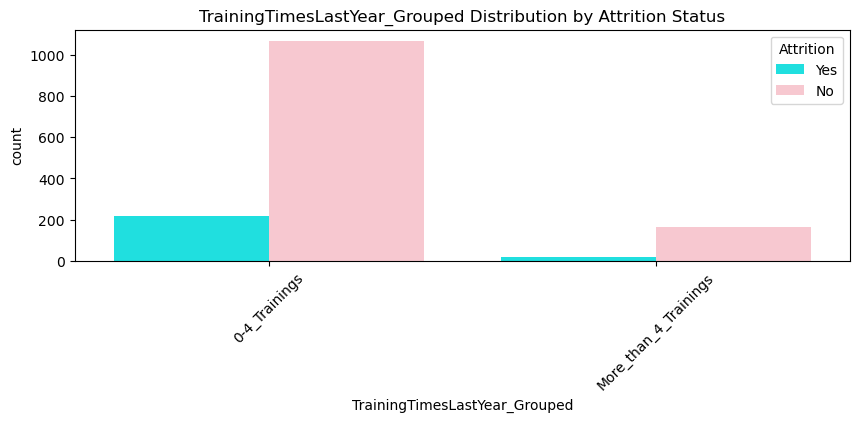

Stay  Attrition  Stay Frequency  \
TrainingTimesLastYear_Grouped                                    
0-4_Trainings                  1069        217        0.831260   
More_than_4_Trainings           164         20        0.891304   

                               Attrition Frequency  
TrainingTimesLastYear_Grouped                       
0-4_Trainings                             0.168740  
More_than_4_Trainings                     0.108696

In [51]:
# Define training categories
low_training = [0, 1, 2, 3, 4]
high_training = [5, 6]

# Function to group TrainingTimesLastYear into custom categories
def group_training_times(df):
    df['TrainingTimesLastYear_Grouped'] = df['TrainingTimesLastYear'].apply(
        lambda x: '0-4_Trainings' if x in low_training else 'More_than_4_Trainings'
    )
    return df

# Apply the function to the dataframe
data2 = group_training_times(data2)

# Call the function to plot and summarize TrainingTimesLastYear_Grouped
summary_TrainingTimesLastYear_Grouped = plot_and_summarize_categorical(data2, 'TrainingTimesLastYear_Grouped')

# Display the summary table
display(summary_TrainingTimesLastYear_Grouped)

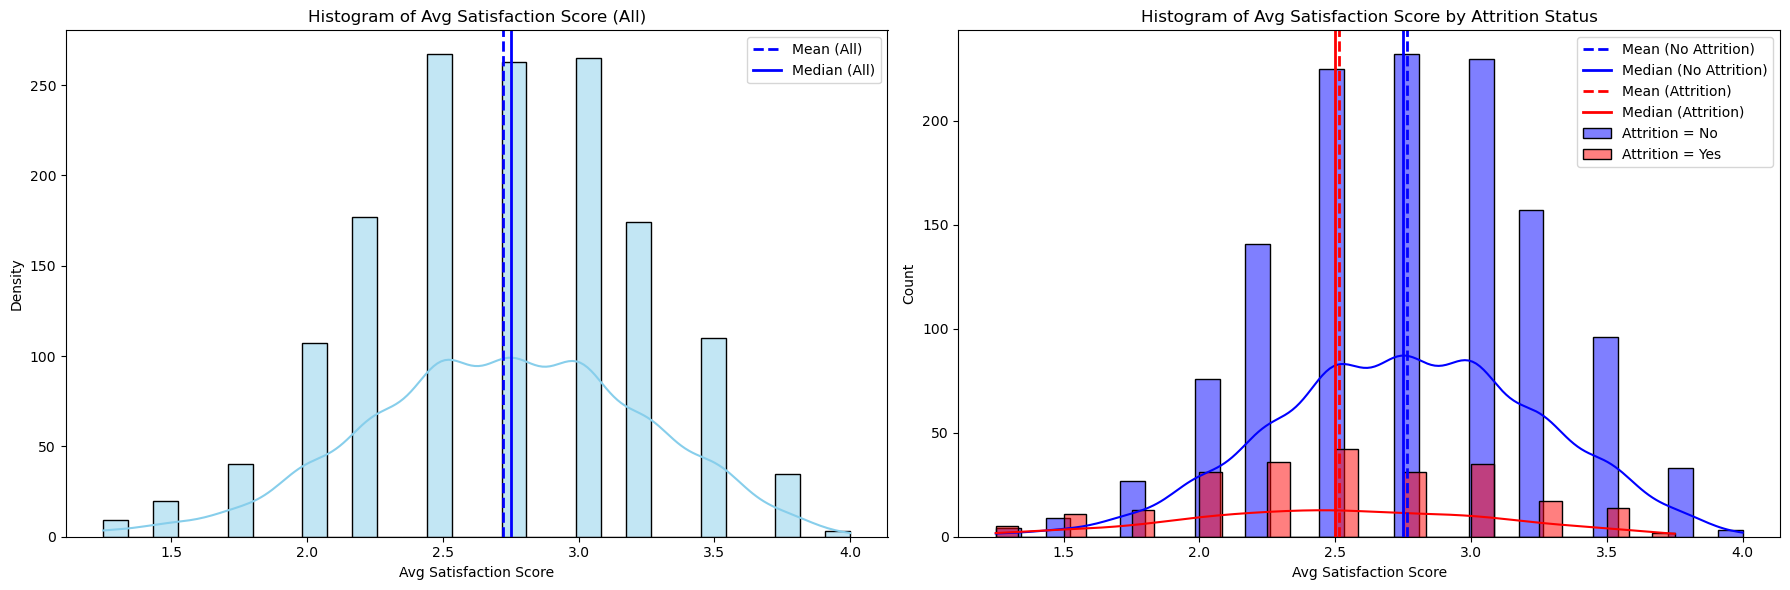

In [52]:
# Calculate the average satisfaction score
data2['Avg_Satisfaction_Score'] = data2[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'JobInvolvement']].mean(axis=1)

# Create side-by-side subplots without sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the histogram for the entire population
sns.histplot(data2['Avg_Satisfaction_Score'], bins=30, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Avg Satisfaction Score (All)')
axes[0].set_xlabel('Avg Satisfaction Score')
axes[0].set_ylabel('Density')

# Calculate mean and median for the entire population
mean_all = data2['Avg_Satisfaction_Score'].mean()
median_all = data2['Avg_Satisfaction_Score'].median()

# Plot mean and median lines for the entire population
axes[0].axvline(mean_all, color='blue', linestyle='dashed', linewidth=2, label='Mean (All)')
axes[0].axvline(median_all, color='blue', linestyle='solid', linewidth=2, label='Median (All)')
axes[0].legend()

# Plot the histogram by Attrition status
sns.histplot(data2[data2['Attrition'] == 'No']['Avg_Satisfaction_Score'], bins=30, kde=True, ax=axes[1], color='blue', label='Attrition = No', edgecolor='black')
sns.histplot(data2[data2['Attrition'] == 'Yes']['Avg_Satisfaction_Score'], bins=30, kde=True, ax=axes[1], color='red', label='Attrition = Yes', edgecolor='black')
axes[1].set_title('Histogram of Avg Satisfaction Score by Attrition Status')
axes[1].set_xlabel('Avg Satisfaction Score')
axes[1].set_ylabel('Count')

# Calculate mean and median for Attrition = No
mean_no = data2[data2['Attrition'] == 'No']['Avg_Satisfaction_Score'].mean()
median_no = data2[data2['Attrition'] == 'No']['Avg_Satisfaction_Score'].median()

# Calculate mean and median for Attrition = Yes
mean_yes = data2[data2['Attrition'] == 'Yes']['Avg_Satisfaction_Score'].mean()
median_yes = data2[data2['Attrition'] == 'Yes']['Avg_Satisfaction_Score'].median()

# Plot mean and median lines for Attrition = No
axes[1].axvline(mean_no, color='blue', linestyle='dashed', linewidth=2, label='Mean (No Attrition)')
axes[1].axvline(median_no, color='blue', linestyle='solid', linewidth=2, label='Median (No Attrition)')

# Plot mean and median lines for Attrition = Yes
axes[1].axvline(mean_yes, color='red', linestyle='dashed', linewidth=2, label='Mean (Attrition)')
axes[1].axvline(median_yes, color='red', linestyle='solid', linewidth=2, label='Median (Attrition)')

axes[1].legend()

plt.tight_layout()
plt.show()

**Observations:**
- Interesting to see that Average of 4 satisfaction scores actually has a well-balanced bell-shaped distribution
- Attrition group tends to have lower Avg_Satisfaction_Score than Stay group

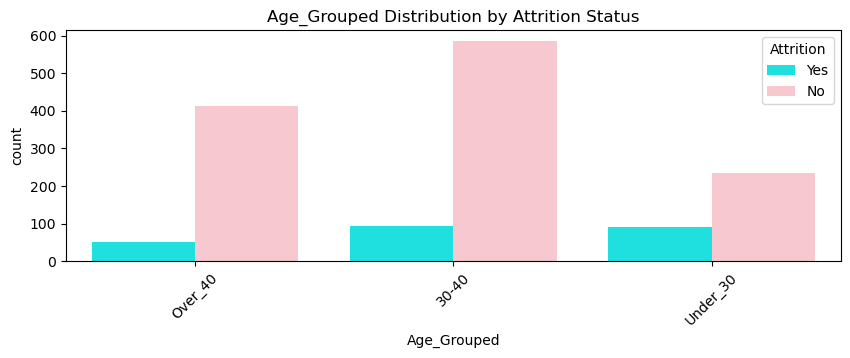

Stay  Attrition  Stay Frequency  Attrition Frequency
Age_Grouped                                                      
Under_30      235         91        0.720859             0.279141
30-40         585         94        0.861561             0.138439
Over_40       413         52        0.888172             0.111828

In [53]:
# Define age categories
young_age = range(0, 30)  # <= 30
middle_age = range(30, 41)  # 31-40
old_age = range(41, 100)  # > 40, using a high upper limit to include all ages

# Function to group Age into custom categories
def group_age(df):
    df['Age_Grouped'] = df['Age'].apply(
        lambda x: 'Under_30' if x in young_age else '30-40' if x in middle_age else 'Over_40'
    )
    return df

# Apply the function to the dataframe
data2 = group_age(data2)

# Call the function to plot and summarize Age_Grouped
summary_Age_Grouped = plot_and_summarize_categorical(data2, 'Age_Grouped')

# Sort the summary table by the defined order
summary_Age_Grouped = summary_Age_Grouped.loc[['Under_30', '30-40', 'Over_40']]

# Display the summary table
display(summary_Age_Grouped)

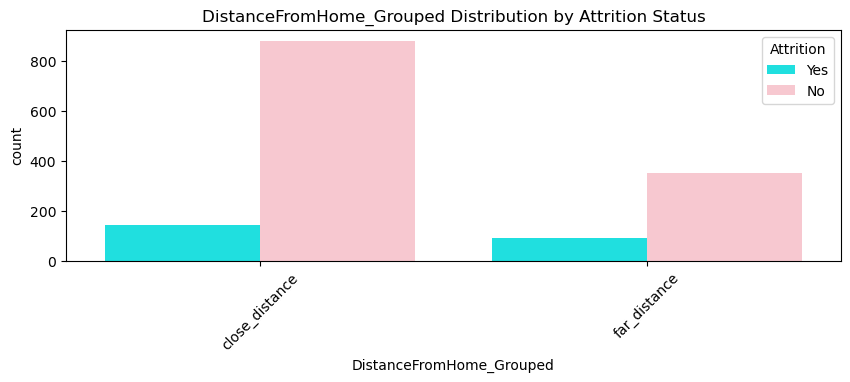

Stay  Attrition  Stay Frequency  Attrition Frequency
DistanceFromHome_Grouped                                                      
close_distance             882        144        0.859649             0.140351
far_distance               351         93        0.790541             0.209459

In [54]:
# Define distance categories
close_distance = range(0, 11)  # <= 10
far_distance = range(11, 100)  # > 10, using a high upper limit to include all distances

# Function to group DistanceFromHome into custom categories
def group_distance_from_home(df):
    df['DistanceFromHome_Grouped'] = df['DistanceFromHome'].apply(
        lambda x: 'close_distance' if x in close_distance else 'far_distance'
    )
    return df

# Apply the function to the dataframe
data2 = group_distance_from_home(data2)

# Call the function to plot and summarize DistanceFromHome_Grouped
summary_DistanceFromHome_Grouped = plot_and_summarize_categorical(data2, 'DistanceFromHome_Grouped')

# Sort the summary table by the defined order
summary_DistanceFromHome_Grouped = summary_DistanceFromHome_Grouped.loc[['close_distance', 'far_distance']]

# Display the summary table
display(summary_DistanceFromHome_Grouped)

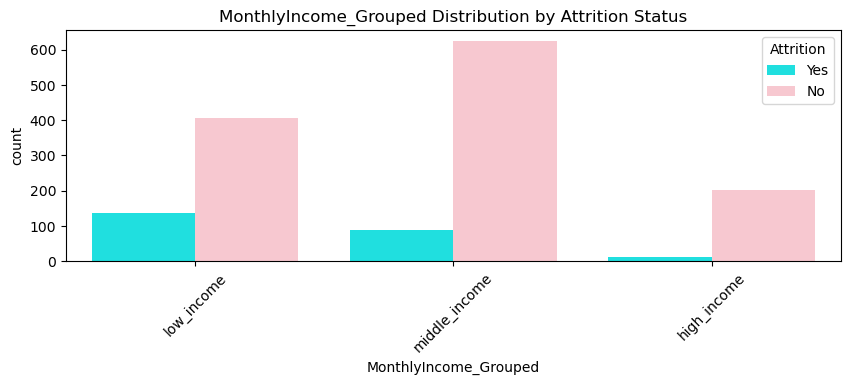

Stay  Attrition  Stay Frequency  Attrition Frequency
MonthlyIncome_Grouped                                                      
low_income              406        137        0.747698             0.252302
middle_income           624         88        0.876404             0.123596
high_income             203         12        0.944186             0.055814

In [55]:
# Function to group MonthlyIncome into custom categories
def group_monthly_income(df):
    bins = [0, 4000, 11000, float('inf')]
    labels = ['low_income', 'middle_income', 'high_income']
    df['MonthlyIncome_Grouped'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=True)
    return df

# Apply the function to the dataframe
data2 = group_monthly_income(data2)

# Call the function to plot and summarize MonthlyIncome_Grouped
summary_MonthlyIncome_Grouped = plot_and_summarize_categorical(data2, 'MonthlyIncome_Grouped')

# Sort the summary table by the defined order
summary_MonthlyIncome_Grouped = summary_MonthlyIncome_Grouped.loc[['low_income', 'middle_income', 'high_income']]

# Display the summary table
display(summary_MonthlyIncome_Grouped)

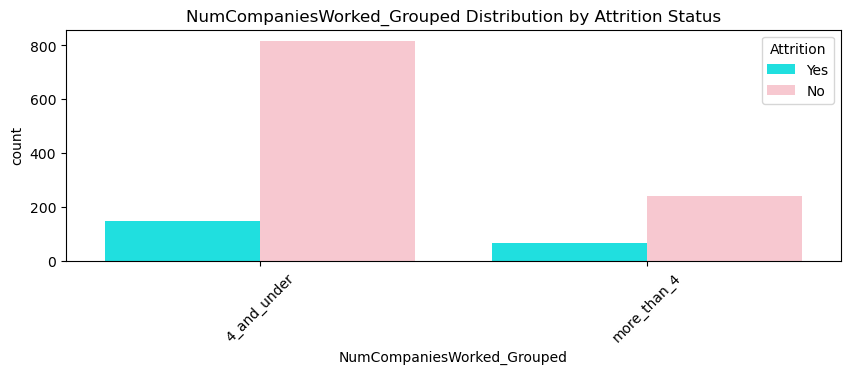

Stay  Attrition  Stay Frequency  \
NumCompaniesWorked_Grouped                                    
4_and_under                  818        147        0.847668   
more_than_4                  241         67        0.782468   

                            Attrition Frequency  
NumCompaniesWorked_Grouped                       
4_and_under                            0.152332  
more_than_4                            0.217532

In [56]:
# Function to group NumCompaniesWorked into custom categories
def group_num_companies_worked(df):
    bins = [0, 4, float('inf')]
    labels = ['4_and_under', 'more_than_4']
    df['NumCompaniesWorked_Grouped'] = pd.cut(df['NumCompaniesWorked'], bins=bins, labels=labels, right=True)
    return df

# Apply the function to the dataframe
data2 = group_num_companies_worked(data2)

# Call the function to plot and summarize NumCompaniesWorked_Grouped
summary_NumCompaniesWorked_Grouped = plot_and_summarize_categorical(data2, 'NumCompaniesWorked_Grouped')

# Sort the summary table by the defined order
summary_NumCompaniesWorked_Grouped = summary_NumCompaniesWorked_Grouped.loc[['4_and_under', 'more_than_4']]

# Display the summary table
display(summary_NumCompaniesWorked_Grouped)

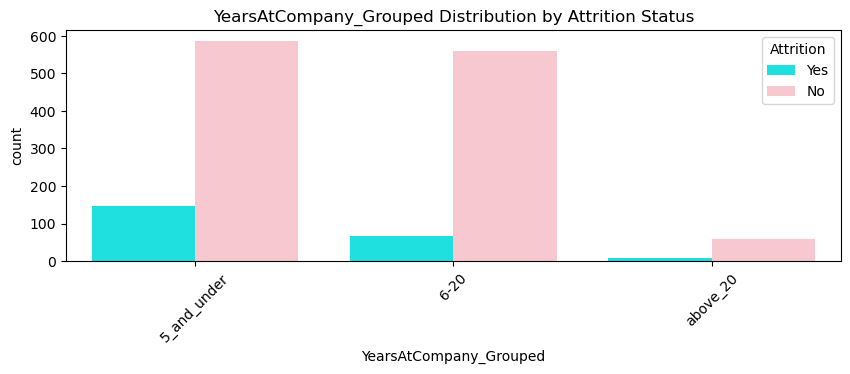

Stay  Attrition  Stay Frequency  Attrition Frequency
YearsAtCompany_Grouped                                                      
5_and_under              586        146        0.800546             0.199454
6-20                     561         67        0.893312             0.106688
above_20                  58          8        0.878788             0.121212

In [57]:
# Function to group YearsAtCompany into custom categories
def group_years_at_company(df):
    bins = [0, 5, 20, float('inf')]
    labels = ['5_and_under', '6-20', 'above_20']
    df['YearsAtCompany_Grouped'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels, right=True)
    return df

# Apply the function to the dataframe
data2 = group_years_at_company(data2)

# Call the function to plot and summarize YearsAtCompany_Grouped
summary_YearsAtCompany_Grouped = plot_and_summarize_categorical(data2, 'YearsAtCompany_Grouped')

# Sort the summary table by the defined order
summary_YearsAtCompany_Grouped = summary_YearsAtCompany_Grouped.loc[['5_and_under', '6-20', 'above_20']]

# Display the summary table
display(summary_YearsAtCompany_Grouped)

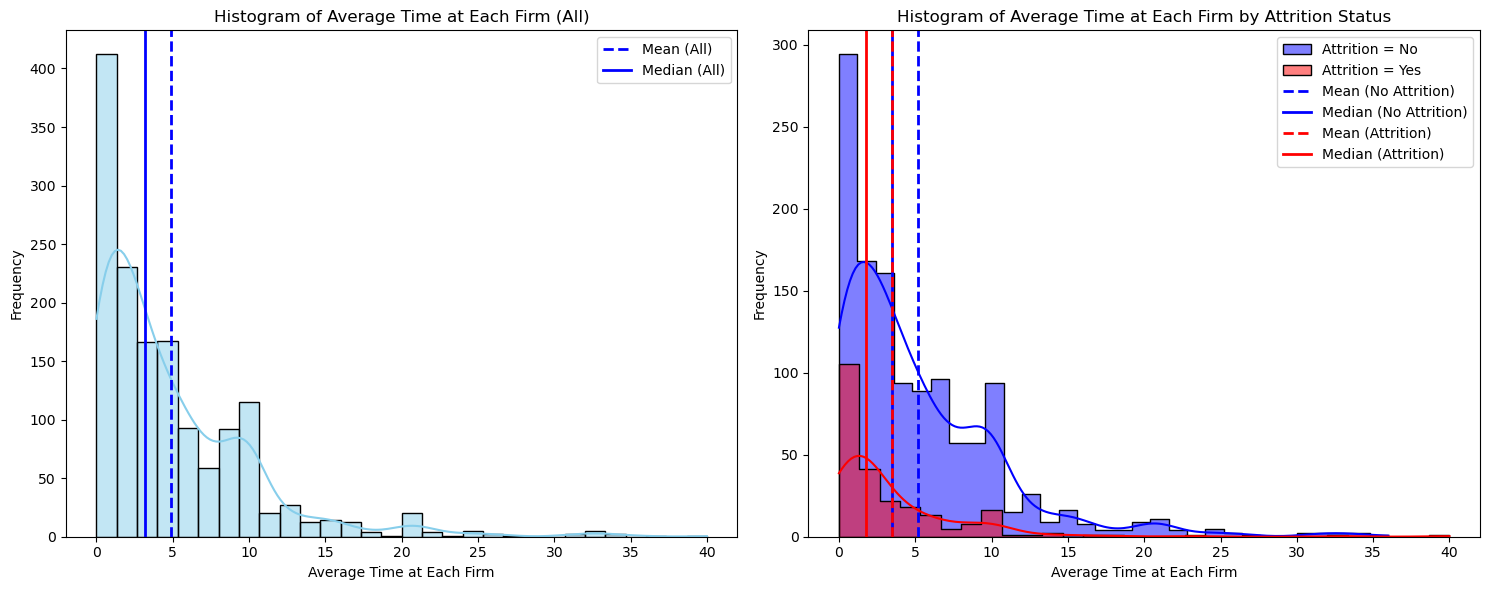

In [58]:
# Function to calculate Average Time at each firm
def calculate_avg_time_at_firm(df):
    df['AvgTimeAtFirm'] = df['TotalWorkingYears'] / df['NumCompaniesWorked']
    return df

# Apply the function to the dataframe
data2 = calculate_avg_time_at_firm(data2)

# Handle potential division by zero or missing values by filling with 0 or appropriate value
data2['AvgTimeAtFirm'] = data2['AvgTimeAtFirm'].replace([float('inf'), -float('inf')], 0).fillna(0)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram for the entire population
sns.histplot(data2['AvgTimeAtFirm'], bins=30, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Average Time at Each Firm (All)')
axes[0].set_xlabel('Average Time at Each Firm')
axes[0].set_ylabel('Frequency')

# Calculate mean and median for the entire population
mean_all = data2['AvgTimeAtFirm'].mean()
median_all = data2['AvgTimeAtFirm'].median()

# Plot mean and median lines for the entire population
axes[0].axvline(mean_all, color='blue', linestyle='dashed', linewidth=2, label='Mean (All)')
axes[0].axvline(median_all, color='blue', linestyle='solid', linewidth=2, label='Median (All)')
axes[0].legend()

# Plot the overlapping histograms by Attrition status
sns.histplot(data2[data2['Attrition'] == 'No']['AvgTimeAtFirm'], bins=30, kde=True, ax=axes[1], color='blue', element='step', label='Attrition = No', edgecolor='black')
sns.histplot(data2[data2['Attrition'] == 'Yes']['AvgTimeAtFirm'], bins=30, kde=True, ax=axes[1], color='red', element='step', label='Attrition = Yes', edgecolor='black')
axes[1].set_title('Histogram of Average Time at Each Firm by Attrition Status')
axes[1].set_xlabel('Average Time at Each Firm')
axes[1].set_ylabel('Frequency')

# Calculate mean and median for Attrition = No
mean_no = data2[data2['Attrition'] == 'No']['AvgTimeAtFirm'].mean()
median_no = data2[data2['Attrition'] == 'No']['AvgTimeAtFirm'].median()

# Calculate mean and median for Attrition = Yes
mean_yes = data2[data2['Attrition'] == 'Yes']['AvgTimeAtFirm'].mean()
median_yes = data2[data2['Attrition'] == 'Yes']['AvgTimeAtFirm'].median()

# Plot mean and median lines for Attrition = No
axes[1].axvline(mean_no, color='blue', linestyle='dashed', linewidth=2, label='Mean (No Attrition)')
axes[1].axvline(median_no, color='blue', linestyle='solid', linewidth=2, label='Median (No Attrition)')

# Plot mean and median lines for Attrition = Yes
axes[1].axvline(mean_yes, color='red', linestyle='dashed', linewidth=2, label='Mean (Attrition)')
axes[1].axvline(median_yes, color='red', linestyle='solid', linewidth=2, label='Median (Attrition)')

# Add legend to the second plot
axes[1].legend()

plt.tight_layout()
plt.show()

In [59]:
# Calculate mean and median of AvgTimeAtFirm by Attrition status
avg_time_stats = data2.groupby('Attrition')['AvgTimeAtFirm'].agg(['mean', 'median']).reset_index()

# Calculate overall mean and median of AvgTimeAtFirm
overall_mean = data2['AvgTimeAtFirm'].mean()
overall_median = data2['AvgTimeAtFirm'].median()

# Add overall mean and median as a separate row
overall_stats = pd.DataFrame({
    'Attrition': ['Overall'],
    'mean': [overall_mean],
    'median': [overall_median]
})

# Append the overall stats to the existing DataFrame
avg_time_stats = pd.concat([avg_time_stats, overall_stats], ignore_index=True)

# Display the results
display(avg_time_stats)

Attrition      mean    median
0        No  5.165346  3.500000
1       Yes  3.469900  1.750000
2   Overall  4.891999  3.183333

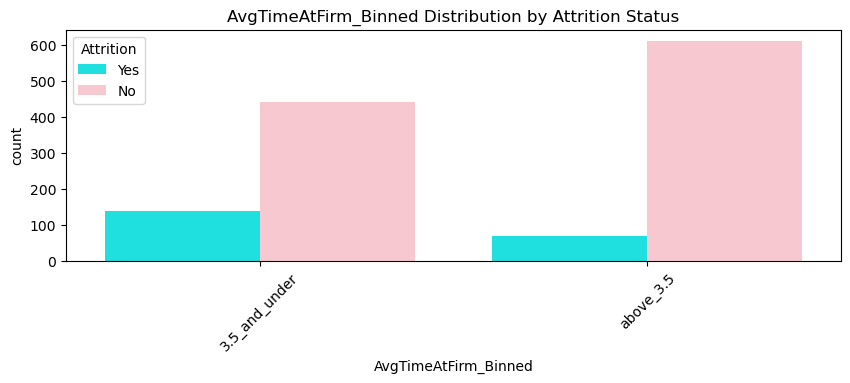

Stay  Attrition  Stay Frequency  Attrition Frequency
AvgTimeAtFirm_Binned                                                      
3.5_and_under          441        139        0.760345             0.239655
above_3.5              612         70        0.897361             0.102639

In [60]:
# Function to group AvgTimeAtFirm into custom categories
def group_avg_time_at_firm(df):
    bins = [0, 3.5, float('inf')]
    labels = ['3.5_and_under', 'above_3.5']
    df['AvgTimeAtFirm_Binned'] = pd.cut(df['AvgTimeAtFirm'], bins=bins, labels=labels, right=True)
    return df

# Apply the function to the dataframe
data2 = group_avg_time_at_firm(data2)

# Call the function to plot and summarize AvgTimeAtFirm_Binned
summary_AvgTimeAtFirm_Binned = plot_and_summarize_categorical(data2, 'AvgTimeAtFirm_Binned')

# Sort the summary table by the defined order
summary_AvgTimeAtFirm_Binned = summary_AvgTimeAtFirm_Binned.loc[['3.5_and_under', 'above_3.5']]

# Display the summary table
display(summary_AvgTimeAtFirm_Binned)

### 5.2. Remove original columns

In [61]:
# Remove the original column from the dataframe
data2_prepped = data2.drop(columns=['EducationField', 'JobRole', 'JobRole_Grouped',
                            'MaritalStatus', 'Education', 'TrainingTimesLastYear', 
                            'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'JobInvolvement',
                            'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany', 
                            'TotalWorkingYears', 'AvgTimeAtFirm',
                            'MonthlyRate', 'DailyRate', 'HourlyRate'])

In [62]:
data2_prepped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Attrition                      1470 non-null   object  
 1   BusinessTravel                 1470 non-null   object  
 2   Department                     1470 non-null   object  
 3   Gender                         1470 non-null   object  
 4   JobLevel                       1470 non-null   int64   
 5   OverTime                       1470 non-null   object  
 6   PercentSalaryHike              1470 non-null   int64   
 7   PerformanceRating              1470 non-null   int64   
 8   StockOptionLevel               1470 non-null   int64   
 9   WorkLifeBalance                1470 non-null   int64   
 10  YearsInCurrentRole             1470 non-null   int64   
 11  YearsSinceLastPromotion        1470 non-null   int64   
 12  YearsWithCurrManager           147

### 5.4. Rerun 3 models to assess feature importance and model performance

In [63]:
# Prepare the data
X = data2_prepped.drop(columns=['Attrition'])
y = data2_prepped['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_
rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_
xgb_predictions = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Logistic Regression with L1 Regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_model.fit(X_train_scaled, y_train)
logreg_importances = np.abs(logreg_model.coef_[0])
logreg_predictions = logreg_model.predict(X_test_scaled)
logreg_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Combine feature importances into a DataFrame for comparison
feature_names = X.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'LogisticRegression_L1': logreg_importances
})

C:\Users\Eliza Bui\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:06:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [65]:
# Sort and get the top 10 features for each model
top_rf_2 = importances_df[['Feature', 'RandomForest']].sort_values(by='RandomForest', ascending=False).head(10)
top_xgb_2 = importances_df[['Feature', 'XGBoost']].sort_values(by='XGBoost', ascending=False).head(10)
top_logreg_2 = importances_df[['Feature', 'LogisticRegression_L1']].sort_values(by='LogisticRegression_L1', ascending=False).head(10)

print("Top 10 Features for Random Forest:")
display(top_rf_2)
print("\nTop 10 Features for XGBoost:")
display(top_xgb_2)
print("\nTop 10 Features for Logistic Regression with L1 Regularization:")
display(top_logreg_2)

Top 10 Features for Random Forest:


Feature  RandomForest
8         Avg_Satisfaction_Score      0.103106
14                  OverTime_Yes      0.082244
1              PercentSalaryHike      0.076726
5             YearsInCurrentRole      0.068719
7           YearsWithCurrManager      0.068522
6        YearsSinceLastPromotion      0.060022
0                       JobLevel      0.052604
4                WorkLifeBalance      0.049119
3               StockOptionLevel      0.047402
16  MaritalStatus_Grouped_Single      0.033282


Top 10 Features for XGBoost:


Feature   XGBoost
14                            OverTime_Yes  0.126680
0                                 JobLevel  0.079627
16            MaritalStatus_Grouped_Single  0.058956
12                        Department_Sales  0.050021
3                         StockOptionLevel  0.046919
9         BusinessTravel_Travel_Frequently  0.045138
15           EducationField_Grouped_LS_M_O  0.037849
26         YearsAtCompany_Grouped_above_20  0.037396
8                   Avg_Satisfaction_Score  0.036145
24  NumCompaniesWorked_Grouped_more_than_4  0.035218


Top 10 Features for Logistic Regression with L1 Regularization:


Feature  LogisticRegression_L1
14                            OverTime_Yes               0.884326
23       MonthlyIncome_Grouped_high_income               0.849046
8                   Avg_Satisfaction_Score               0.656084
22     MonthlyIncome_Grouped_middle_income               0.600192
9         BusinessTravel_Travel_Frequently               0.572938
5                       YearsInCurrentRole               0.510428
6                  YearsSinceLastPromotion               0.496341
16            MaritalStatus_Grouped_Single               0.440964
24  NumCompaniesWorked_Grouped_more_than_4               0.418991
21   DistanceFromHome_Grouped_far_distance               0.373287

In [66]:
# Find the intersection of the top 10 features for all three models
common_features_2 = set(top_rf_2['Feature']).intersection(set(top_xgb_2['Feature'])).intersection(set(top_logreg_2['Feature']))
print("\nFeatures common in top 10 of all 3 models:")
print(common_features_2)


Features common in top 10 of all 3 models:
{'OverTime_Yes', 'Avg_Satisfaction_Score', 'MaritalStatus_Grouped_Single'}


**Observations:**
<br>
- OverTime_Yes, MaritalStatus_Grouped_Single, Avg_Satisfaction_Score are consistently highly important in all three models
- Other variables are only important in specific models

### Let's look at prediction performance of 3 models using transformed features

**Reminder of goal: We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 83.90%**

In [67]:
# Calculate performance metrics
def calculate_metrics(y_true, y_pred, y_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_probs)
    return accuracy, precision, recall, f1, auc

rf_metrics_2 = calculate_metrics(y_test, rf_predictions, rf_probs)
xgb_metrics_2 = calculate_metrics(y_test, xgb_predictions, xgb_probs)
logreg_metrics_2 = calculate_metrics(y_test, logreg_predictions, logreg_probs)

# Create a DataFrame to compare the metrics
metrics_df_2 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'RandomForest': rf_metrics_2,
    'XGBoost': xgb_metrics_2,
    'LogisticRegression_L1': logreg_metrics_2
})

display(metrics_df_2)

Metric  RandomForest   XGBoost  LogisticRegression_L1
0   Accuracy      0.884354  0.863946               0.884354
1  Precision      0.777778  0.476190               0.631579
2     Recall      0.179487  0.256410               0.307692
3   F1 Score      0.291667  0.333333               0.413793
4    AUC-ROC      0.762594  0.755053               0.802212

**Observations:**
<br>
- **Accuracy**: All models have similar accuracy, with Logistic Regression slightly higher at 88.4%, which is lower than the Logistic Regresion using untransformed features at 89.46%

- **Logistic Regression** with L1 Regularization shows the best overall performance. However, all performance metrics: Accuracy, Precision, Recall, F1 Score are lower than Logistic Regression using untransformed features. Only AUC-ROC improves a tiny bit.

- **Random Forest** excels in precision but performs poorly in recall and F1 score. Compared to Random Forest before feature engineering, Random Forest here decreases in Precision but improves in Recall and F1 score and AUC-ROC

- **XGBoost** has moderate performance across all metrics but does not outperform Logistic Regression. Compared to XGBoost before feature engineering, XGBoost here decreases in Accuracy, Precision, Recall, and F1 score but improves only slightly in AUC-ROC

#### Confusion Matrix

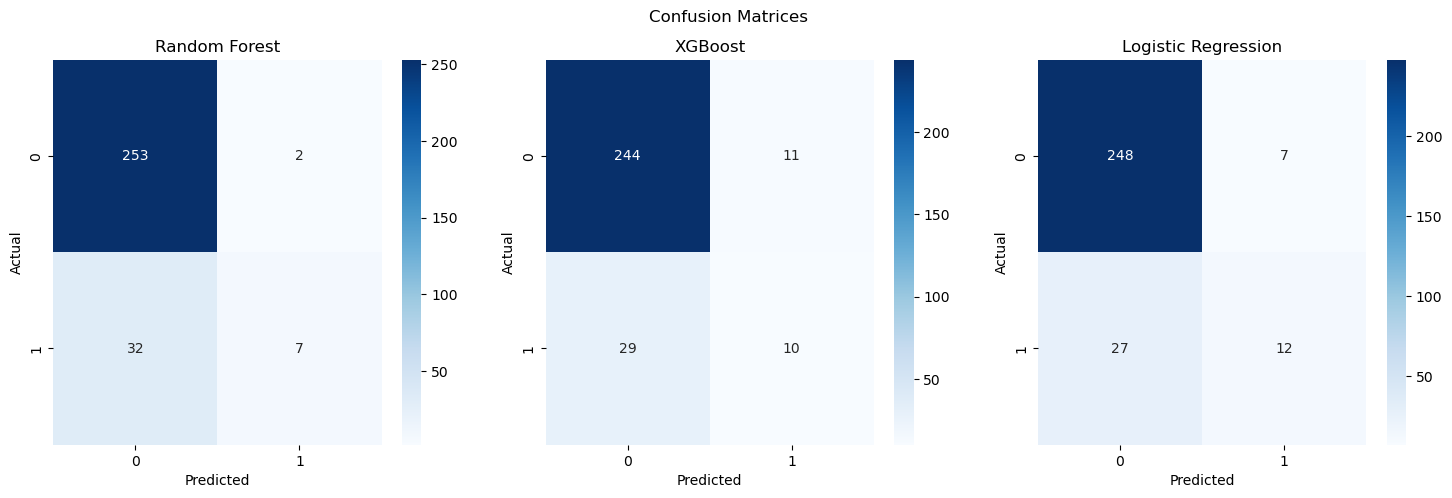

In [68]:
# Calculate confusion matrices
rf_cm = confusion_matrix(y_test, rf_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
logreg_cm = confusion_matrix(y_test, logreg_predictions)

# Plot confusion matrices manually
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices')

sns.heatmap(rf_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(xgb_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('XGBoost')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(logreg_cm, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Logistic Regression')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

### ROC Curves

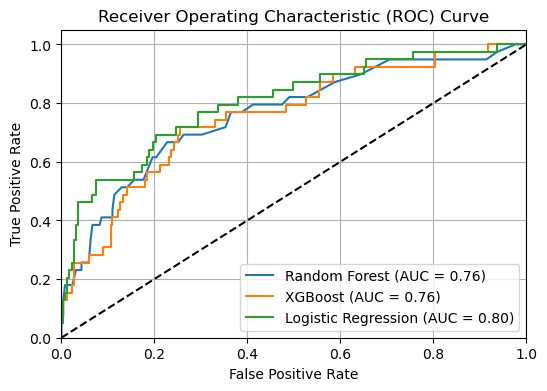

In [69]:
# Calculate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Calculate AUC-ROC
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

# Plot ROC curves
plt.figure(figsize=(6, 4))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Reduce model complexity

Feature Count  Accuracy  Precision    Recall  F1 Score
0             10  0.850340   0.400000  0.256410  0.312500
1             15  0.846939   0.350000  0.179487  0.237288
2             20  0.891156   0.684211  0.333333  0.448276
3             25  0.884354   0.631579  0.307692  0.413793
4             30  0.884354   0.631579  0.307692  0.413793

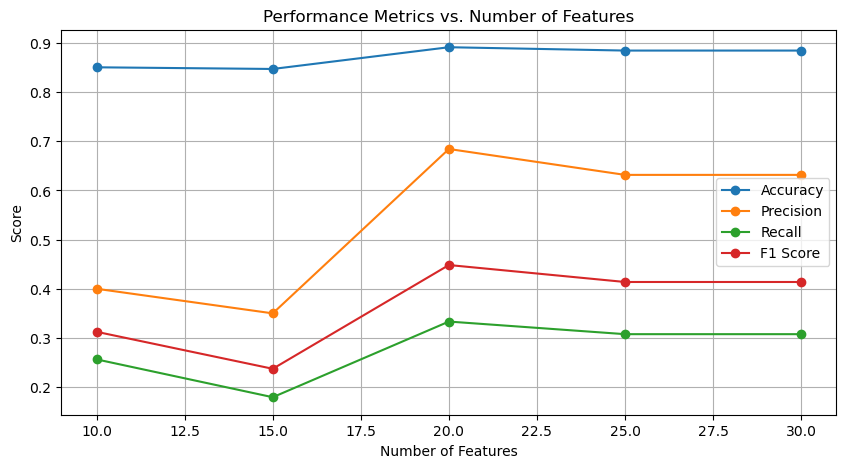

In [70]:
# Extract and rank coefficients by absolute importance
coefficients = np.abs(logreg_model.coef_[0])
sorted_indices = np.argsort(coefficients)[::-1]  # Sort in descending order

# Function to evaluate performance for different feature counts
def evaluate_feature_counts(X_train, y_train, X_test, y_test, sorted_indices, counts):
    results = []
    for count in counts:
        # Select top 'count' features
        selected_indices = sorted_indices[:count]
        X_train_selected = X_train[:, selected_indices]
        X_test_selected = X_test[:, selected_indices]

        # Train logistic regression on selected features
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
        model.fit(X_train_selected, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Append results
        results.append((count, accuracy, precision, recall, f1))
    
    return pd.DataFrame(results, columns=['Feature Count', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Evaluate for feature counts of 15, 20, and 25
feature_counts = [10, 15, 20, 25, 30]
performance_df = evaluate_feature_counts(X_train_scaled, y_train, X_test_scaled, y_test, sorted_indices, feature_counts)

# Display results
display(performance_df)

# Plotting the performance metrics
plt.figure(figsize=(10, 5))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(performance_df['Feature Count'], performance_df[metric], marker='o', label=metric)

plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Extract and sort coefficients by absolute importance
coefficients = np.abs(logreg_model.coef_[0])
sorted_indices = np.argsort(coefficients)[::-1]  # Sort in descending order
top_20_indices = sorted_indices[:20]  # Get indices of top 20 features

# Get feature names and importance for top 20 features
top_20_features = X.columns[top_20_indices]
top_20_importance = coefficients[top_20_indices]

# Create a DataFrame for top 20 features and their importance
top_20_df = pd.DataFrame({'Feature': top_20_features, 'Importance': top_20_importance})
print("Top 20 Features by Importance:")
print(top_20_df)

# Select top 20 features for training and testing
X_train_top20 = X_train_scaled[:, top_20_indices]
X_test_top20 = X_test_scaled[:, top_20_indices]

# Retrain the model with top 20 features
logreg_top20 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_top20.fit(X_train_top20, y_train)

# Evaluate the model
y_pred_top20 = logreg_top20.predict(X_test_top20)

accuracy_top20 = accuracy_score(y_test, y_pred_top20)
recall_top20 = recall_score(y_test, y_pred_top20)
precision_top20 = precision_score(y_test, y_pred_top20)
f1_top20 = f1_score(y_test, y_pred_top20)

print(f"Top 20 Features Model Accuracy: {accuracy_top20:.4f}")
print(f"Top 20 Features Model Precision: {precision_top20:.4f}")
print(f"Top 20 Features Model Recall: {recall_top20:.4f}")
print(f"Top 20 Features Model F1 Score: {f1_top20:.4f}")

Top 20 Features by Importance:
                                   Feature  Importance
0                             OverTime_Yes    0.884326
1        MonthlyIncome_Grouped_high_income    0.849046
2                   Avg_Satisfaction_Score    0.656084
3      MonthlyIncome_Grouped_middle_income    0.600192
4         BusinessTravel_Travel_Frequently    0.572938
5                       YearsInCurrentRole    0.510428
6                  YearsSinceLastPromotion    0.496341
7             MaritalStatus_Grouped_Single    0.440964
8   NumCompaniesWorked_Grouped_more_than_4    0.418991
9    DistanceFromHome_Grouped_far_distance    0.373287
10                    YearsWithCurrManager    0.354107
11         YearsAtCompany_Grouped_above_20    0.345713
12            BusinessTravel_Travel_Rarely    0.306014
13       Department_Research & Development    0.245980
14             YearsAtCompany_Grouped_6-20    0.243066
15           EducationField_Grouped_LS_M_O    0.222376
16                        StockOpt

**Observations:** After the first round of feature engineering and using the 20 most important features with Logistic Regression L1, Accuracy improves to 89.1%, which is closer to Accuracy before feature engineering, but Recall and F1-score are still much lower

### VI. Feature Engineering to improve model performance: Interaction between features

What we often observe about people who are likely to quit are
<br>

(1)	Young, single, low-income workers who seek better economic opportunities
<br>

(2)	Overworked employees with high stress levels are more prone to burnout
<br>

(3)	Employees experiencing job dissatisfaction due to a lack of career progression, poor management, or a mismatch between job responsibilities and personal interests
<br>

(4)	MisalignedRoleTenure: employees who may be in roles that do not fully leverage their skills or experience, potentially leading to dissatisfaction

(5) Education Field and Current Job Misalignment

#### 1. Interaction: Marital Status, Age, and Income

Count of unique values in 'Young_Single_LowIncome':


Young_Single_LowIncome
0    1373
1      97
Name: count, dtype: int64

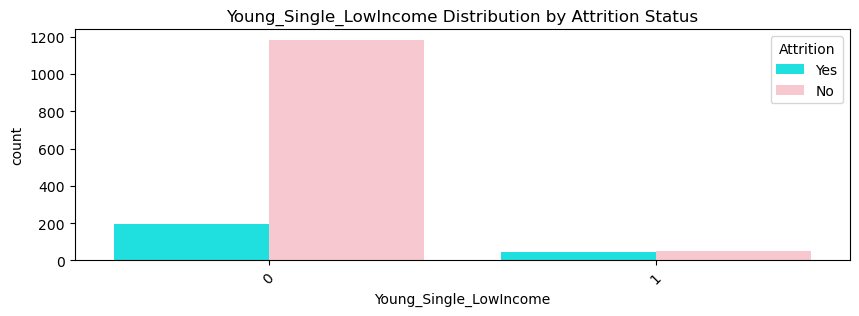

Stay  Attrition  Stay Frequency  Attrition Frequency
Young_Single_LowIncome                                                      
0                       1180        193        0.859432             0.140568
1                         53         44        0.546392             0.453608

In [72]:
# Function to create the Young, Single, Low-Income interaction feature
def create_young_single_low_income_feature(df):
    df['Young_Single_LowIncome'] = (
        (df['Age_Grouped'] == 'Under_30') &  # Ensure this matches the age grouping
        (df['MaritalStatus_Grouped'] == 'Single') &
        (df['MonthlyIncome_Grouped'] == 'low_income')
    ).astype(int)
    return df

# Apply the function to create the feature
data2 = create_young_single_low_income_feature(data2)

# Count unique values in the Young_Single_LowIncome column
young_single_low_income_counts = data2['Young_Single_LowIncome'].value_counts()
print("Count of unique values in 'Young_Single_LowIncome':")
display(young_single_low_income_counts)

# Plot and summarize Young_Single_LowIncome
summary_Young_Single_LowIncome = plot_and_summarize_categorical(data2, 'Young_Single_LowIncome')

# Sort the summary table by the defined order (0 for No, 1 for Yes)
summary_Young_Single_LowIncome = summary_Young_Single_LowIncome.loc[[0, 1]]

# Display the summary table
display(summary_Young_Single_LowIncome)

#### 2. Interaction: OverTime, WorkLifeBalance

Count of unique values in 'Overworked_HighStress':
Overworked_HighStress
0    1344
1     126
Name: count, dtype: int64


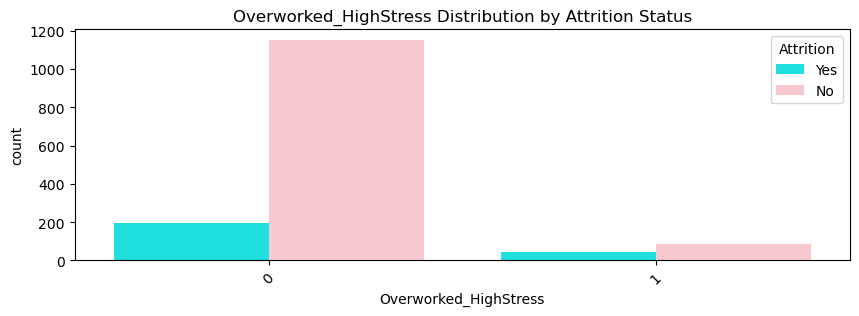

Stay  Attrition  Stay Frequency  Attrition Frequency
Overworked_HighStress                                                      
0                      1149        195        0.854911             0.145089
1                        84         42        0.666667             0.333333

In [73]:
# Function to create Overworked, High-Stress interaction feature
def create_overworked_high_stress_feature(df):
    df['Overworked_HighStress'] = (
        (df['OverTime'] == 'Yes') &  # Employees who work overtime
        (df['WorkLifeBalance'] <= 2)  # Assuming 1 and 2 are low work-life balance scores
    ).astype(int)
    return df

# Apply the function to create the feature
data2 = create_overworked_high_stress_feature(data2)

# Count unique values in the Overworked_HighStress column
overworked_high_stress_counts = data2['Overworked_HighStress'].value_counts()
print("Count of unique values in 'Overworked_HighStress':")
print(overworked_high_stress_counts)

# Plot and summarize Overworked_HighStress
summary_Overworked_HighStress = plot_and_summarize_categorical(data2, 'Overworked_HighStress')

# Sort the summary table by the defined order (0 for No, 1 for Yes)
summary_Overworked_HighStress = summary_Overworked_HighStress.loc[[0, 1]]

# Display the summary table
display(summary_Overworked_HighStress)

#### 3. Interaction: Avg_Satisfaction_Score, YearsSinceLastPromotion

Count of unique values in 'JobDissatisfaction':
JobDissatisfaction
1    737
0    733
Name: count, dtype: int64


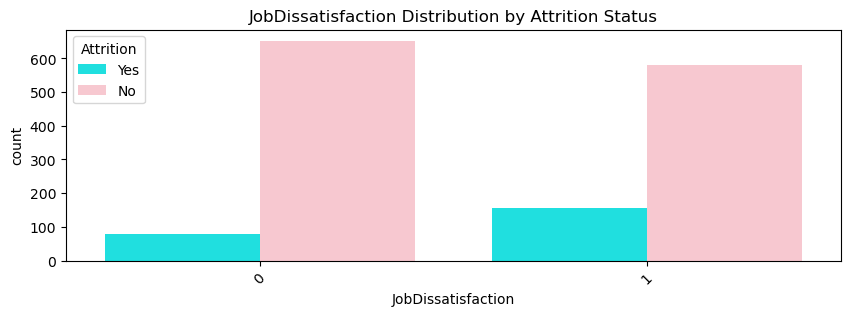

Stay  Attrition  Stay Frequency  Attrition Frequency
JobDissatisfaction                                                      
0                    653         80        0.890859             0.109141
1                    580        157        0.786974             0.213026

In [74]:
# Function to create Job Dissatisfaction interaction feature
def create_job_dissatisfaction_feature(df):
    df['JobDissatisfaction'] = (
        (df['Avg_Satisfaction_Score'] <= 2.5) |  # Assuming scores range from 1 (low) to 4 (high)
        (df['YearsSinceLastPromotion'] > 5)  # Employees who haven't been promoted in more than 5 years
    ).astype(int)
    return df

# Apply the function to create the feature
data2 = create_job_dissatisfaction_feature(data2)

# Count unique values in the JobDissatisfaction column
job_dissatisfaction_counts = data2['JobDissatisfaction'].value_counts()
print("Count of unique values in 'JobDissatisfaction':")
print(job_dissatisfaction_counts)

# Plot and summarize JobDissatisfaction
summary_JobDissatisfaction = plot_and_summarize_categorical(data2, 'JobDissatisfaction')

# Sort the summary table by the defined order (0 for No, 1 for Yes)
summary_JobDissatisfaction = summary_JobDissatisfaction.loc[[0, 1]]

# Display the summary table
display(summary_JobDissatisfaction)

#### 4. Interaction: Years Since Last Promotion, Job Level, Total Working Years

Count of unique values in 'CareerProgressionIssues':
CareerProgressionIssues
0    1057
1     413
Name: count, dtype: int64


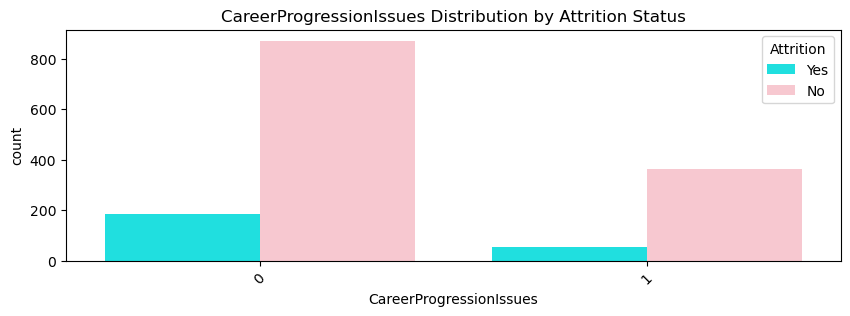

Stay  Attrition  Stay Frequency  Attrition Frequency
CareerProgressionIssues                                                      
0                         872        185        0.824976             0.175024
1                         361         52        0.874092             0.125908

In [75]:
# Function to create Career Progression Issues interaction feature
def create_career_progression_issues_feature(df):
    df['CareerProgressionIssues'] = (
        (df['YearsSinceLastPromotion'] > 5) |  # Employees not promoted in over 5 years
        ((df['JobLevel'] <= 2) & (df['TotalWorkingYears'] > 10))  # Low-level employees with many years of experience
    ).astype(int)
    return df

# Apply the function to create the feature
data2 = create_career_progression_issues_feature(data2)

# Count unique values in the CareerProgressionIssues column
career_progression_issues_counts = data2['CareerProgressionIssues'].value_counts()
print("Count of unique values in 'CareerProgressionIssues':")
print(career_progression_issues_counts)

# Plot and summarize CareerProgressionIssues
summary_CareerProgressionIssues = plot_and_summarize_categorical(data2, 'CareerProgressionIssues')

# Sort the summary table by the defined order (0 for No, 1 for Yes)
summary_CareerProgressionIssues = summary_CareerProgressionIssues.loc[[0, 1]]

# Display the summary table
display(summary_CareerProgressionIssues)

#### 5. Interaction: EducationField, Department

Count of unique values in 'EducationDepartmentMisalignment':
EducationDepartmentMisalignment
0    1138
1     332
Name: count, dtype: int64


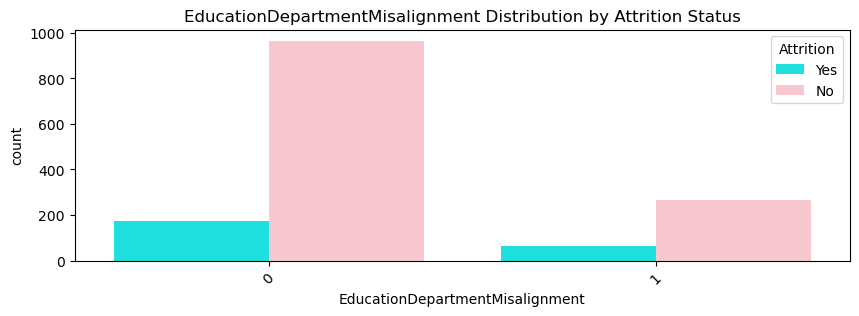

Stay  Attrition  Stay Frequency  \
EducationDepartmentMisalignment                                    
0                                 966        172        0.848858   
1                                 267         65        0.804217   

                                 Attrition Frequency  
EducationDepartmentMisalignment                       
0                                           0.151142  
1                                           0.195783

In [76]:
# Function to create Education Department Misalignment feature
def create_education_department_misalignment_feature(df):
    df['EducationDepartmentMisalignment'] = (
        ((df['EducationField'] == 'Life Sciences') & (df['Department'] != 'Research & Development')) |
        ((df['EducationField'] == 'Medical') & (df['Department'] != 'Research & Development')) |
        ((df['EducationField'] == 'Technical Degree') & (df['Department'] != 'Research & Development')) |
        ((df['EducationField'] == 'Marketing') & (df['Department'] != 'Sales')) |
        ((df['EducationField'] == 'Human Resources') & (df['Department'] != 'HR'))
    ).astype(int)
    return df

# Apply the function to create the feature
data2 = create_education_department_misalignment_feature(data2)

# Count unique values in the EducationDepartmentMisalignment column
education_department_misalignment_counts = data2['EducationDepartmentMisalignment'].value_counts()
print("Count of unique values in 'EducationDepartmentMisalignment':")
print(education_department_misalignment_counts)

# Plot and summarize EducationDepartmentMisalignment
summary_EducationDepartmentMisalignment = plot_and_summarize_categorical(data2, 'EducationDepartmentMisalignment')

# Sort the summary table by the defined order (0 for No, 1 for Yes)
summary_EducationDepartmentMisalignment = summary_EducationDepartmentMisalignment.loc[[0, 1]]

# Display the summary table
display(summary_EducationDepartmentMisalignment)

#### 6. Interaction: EducationField, JobRole, YearsAtCompany

Count of unique values in 'MisalignedRoleTenure':
MisalignedRoleTenure
0    1216
1     254
Name: count, dtype: int64


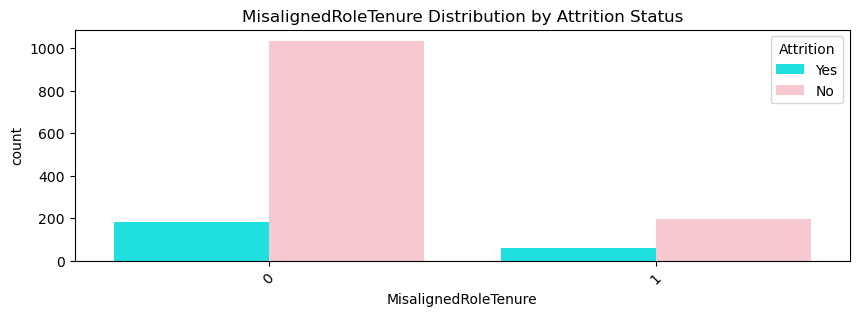

Stay  Attrition  Stay Frequency  Attrition Frequency
MisalignedRoleTenure                                                      
0                     1036        180        0.851974             0.148026
1                      197         57        0.775591             0.224409

In [77]:
# Function to create Misaligned Role Tenure interaction feature
def create_misaligned_role_tenure_feature(df):
    df['MisalignedRoleTenure'] = (
        ((df['JobRole'] == 'Sales Representative') & ~(df['EducationField'].isin(['Marketing']))) |
        ((df['JobRole'] == 'Research Scientist') & ~(df['EducationField'].isin(['Life Sciences', 'Medical', 'Technical Degree']))) |
        ((df['JobRole'] == 'Laboratory Technician') & ~(df['EducationField'].isin(['Life Sciences']))) |
        ((df['JobRole'] == 'Human Resources') & ~(df['EducationField'].isin(['Human Resources']))) |
        ((df['JobRole'] == 'Manager') & (df['JobLevel'] <= 2) & (df['TotalWorkingYears'] > 10)) |
        ((df['JobRole'] == 'Research Director') & ~(df['EducationField'].isin(['Life Sciences', 'Medical', 'Technical Degree']))) |
        ((df['YearsAtCompany'] > 5) & (df['JobRole'] == 'Sales Representative'))
    ).astype(int)
    return df

# Apply the function to create the feature
data2 = create_misaligned_role_tenure_feature(data2)

# Count unique values in the MisalignedRoleTenure column
misaligned_role_tenure_counts = data2['MisalignedRoleTenure'].value_counts()
print("Count of unique values in 'MisalignedRoleTenure':")
print(misaligned_role_tenure_counts)

# Plot and summarize MisalignedRoleTenure
summary_MisalignedRoleTenure = plot_and_summarize_categorical(data2, 'MisalignedRoleTenure')

# Sort the summary table by the defined order (0 for No, 1 for Yes)
summary_MisalignedRoleTenure = summary_MisalignedRoleTenure.loc[[0, 1]]

# Display the summary table
display(summary_MisalignedRoleTenure)

#### 7. Interaction: DistanceFromHome, OverTime

Count of unique values in 'CommuteOverworkStress':
CommuteOverworkStress
0    1333
1     137
Name: count, dtype: int64


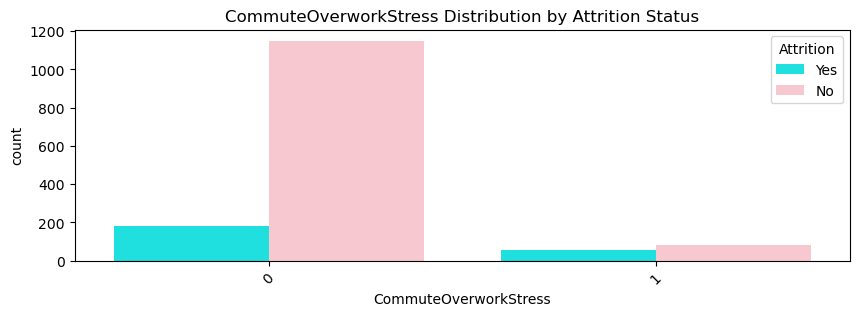

Stay  Attrition  Stay Frequency  Attrition Frequency
CommuteOverworkStress                                                      
0                      1151        182        0.863466             0.136534
1                        82         55        0.598540             0.401460

In [78]:
# Function to create Commute Overwork Stress interaction feature
def create_commute_overwork_stress_feature(df):
    df['CommuteOverworkStress'] = (
        (df['DistanceFromHome_Grouped'] == 'far_distance') &  # Employees with a far commute
        (df['OverTime'] == 'Yes')                             # Employees who work overtime
    ).astype(int)
    return df

# Apply the function to create the feature
data2 = create_commute_overwork_stress_feature(data2)

# Count unique values in the CommuteOverworkStress column
commute_overwork_stress_counts = data2['CommuteOverworkStress'].value_counts()
print("Count of unique values in 'CommuteOverworkStress':")
print(commute_overwork_stress_counts)

# Plot and summarize CommuteOverworkStress
summary_CommuteOverworkStress = plot_and_summarize_categorical(data2, 'CommuteOverworkStress')

# Sort the summary table by the defined order (0 for No, 1 for Yes)
summary_CommuteOverworkStress = summary_CommuteOverworkStress.loc[[0, 1]]

# Display the summary table
display(summary_CommuteOverworkStress)

In [79]:
#data2.info()

In [80]:
# Remove the original column from the dataframe
data3_prepped = data2.drop(columns=['EducationField_Grouped', 'JobRole_Grouped',
                                    'MaritalStatus', 'Education', 'TrainingTimesLastYear', 
                                    'EnvironmentSatisfaction', 'JobSatisfaction', 
                                    'RelationshipSatisfaction', 'JobInvolvement',
                                    'Age', 'DistanceFromHome', 'MonthlyIncome', 
                                    'NumCompaniesWorked', 'YearsAtCompany', 
                                    'AvgTimeAtFirm',
                                    'MonthlyRate', 'DailyRate', 'HourlyRate'])

In [81]:
data3_prepped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Attrition                        1470 non-null   object  
 1   BusinessTravel                   1470 non-null   object  
 2   Department                       1470 non-null   object  
 3   EducationField                   1470 non-null   object  
 4   Gender                           1470 non-null   object  
 5   JobLevel                         1470 non-null   int64   
 6   JobRole                          1470 non-null   object  
 7   OverTime                         1470 non-null   object  
 8   PercentSalaryHike                1470 non-null   int64   
 9   PerformanceRating                1470 non-null   int64   
 10  StockOptionLevel                 1470 non-null   int64   
 11  TotalWorkingYears                1470 non-null   int64   
 12  WorkLi

### 6.2. Rerun 3 models to assess feature importance and model performance

In [82]:
# Prepare the data
X = data3_prepped.drop(columns=['Attrition'])
y = data3_prepped['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_
rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_
xgb_predictions = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Logistic Regression with L1 Regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_model.fit(X_train_scaled, y_train)
logreg_importances = np.abs(logreg_model.coef_[0])
logreg_predictions = logreg_model.predict(X_test_scaled)
logreg_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Combine feature importances into a DataFrame for comparison
feature_names = X.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'LogisticRegression_L1': logreg_importances
})

C:\Users\Eliza Bui\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:06:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [84]:
# Sort and get the top 10 features for each model
top_rf_3 = importances_df[['Feature', 'RandomForest']].sort_values(by='RandomForest', ascending=False).head(10)
top_xgb_3 = importances_df[['Feature', 'XGBoost']].sort_values(by='XGBoost', ascending=False).head(10)
top_logreg_3 = importances_df[['Feature', 'LogisticRegression_L1']].sort_values(by='LogisticRegression_L1', ascending=False).head(10)

print("Top 10 Features for Random Forest:")
display(top_rf_3)
print("\nTop 10 Features for XGBoost:")
display(top_xgb_3)
print("\nTop 10 Features for Logistic Regression with L1 Regularization:")
display(top_logreg_3)

Top 10 Features for Random Forest:


Feature  RandomForest
9    Avg_Satisfaction_Score      0.069084
4         TotalWorkingYears      0.067813
35             OverTime_Yes      0.059003
1         PercentSalaryHike      0.055995
6        YearsInCurrentRole      0.049920
8      YearsWithCurrManager      0.047995
7   YearsSinceLastPromotion      0.040653
3          StockOptionLevel      0.039737
0                  JobLevel      0.039271
5           WorkLifeBalance      0.035472


Top 10 Features for XGBoost:


Feature   XGBoost
35                     OverTime_Yes  0.073670
0                          JobLevel  0.052550
16            CommuteOverworkStress  0.047295
25  EducationField_Technical Degree  0.042514
12               JobDissatisfaction  0.038996
20                 Department_Sales  0.038157
36     MaritalStatus_Grouped_Single  0.037031
32       JobRole_Research Scientist  0.035147
3                  StockOptionLevel  0.031684
30   JobRole_Manufacturing Director  0.029299


Top 10 Features for Logistic Regression with L1 Regularization:


Feature  LogisticRegression_L1
35                            OverTime_Yes               0.866723
43       MonthlyIncome_Grouped_high_income               0.630480
28           JobRole_Laboratory Technician               0.628198
17        BusinessTravel_Travel_Frequently               0.566676
20                        Department_Sales               0.502255
42     MonthlyIncome_Grouped_middle_income               0.486457
44  NumCompaniesWorked_Grouped_more_than_4               0.470488
9                   Avg_Satisfaction_Score               0.466438
6                       YearsInCurrentRole               0.466148
36            MaritalStatus_Grouped_Single               0.387161

In [85]:
# Find the intersection of the top 10 features for all three models
common_features_3 = set(top_rf_3['Feature']).intersection(set(top_xgb_3['Feature'])).intersection(set(top_logreg_3['Feature']))
print("\nFeatures common in top 10 of all 3 models:")
print(common_features_3)


Features common in top 10 of all 3 models:
{'OverTime_Yes'}


**Observations:**
<br>
- OverTime_Yes is consistently highly important in all three models
- Other variables are only important in specific models

### Let's look at prediction performance of 3 models using transformed features

In [86]:
# Calculate performance metrics
def calculate_metrics(y_true, y_pred, y_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_probs)
    return accuracy, precision, recall, f1, auc

rf_metrics_3 = calculate_metrics(y_test, rf_predictions, rf_probs)
xgb_metrics_3 = calculate_metrics(y_test, xgb_predictions, xgb_probs)
logreg_metrics_3 = calculate_metrics(y_test, logreg_predictions, logreg_probs)

# Create a DataFrame to compare the metrics
metrics_df_3 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'RandomForest': rf_metrics_3,
    'XGBoost': xgb_metrics_3,
    'LogisticRegression_L1': logreg_metrics_3
})

display(metrics_df_3)

Metric  RandomForest   XGBoost  LogisticRegression_L1
0   Accuracy      0.891156  0.874150               0.880952
1  Precision      0.888889  0.545455               0.576923
2     Recall      0.205128  0.307692               0.384615
3   F1 Score      0.333333  0.393443               0.461538
4    AUC-ROC      0.760935  0.775767               0.801508

**Observations:**
<br>
- **Accuracy**: All models have similar accuracy, with Logistic Regression slightly higher at 88%, which is lower than the Logistic Regresion using untransformed features at 89.46%

- **Logistic Regression** with L1 Regularization shows the best overall performance. However, all performance metrics: Accuracy, Precision, Recall, F1 Score are lower than Logistic Regression using untransformed features. Only AUC-ROC improves a tiny bit.

- **Random Forest** excels in precision but performs poorly in recall and F1 score. Compared to Random Forest before feature engineering, Random Forest here decreases in Precision but improves in Recall and F1 score and AUC-ROC

- **XGBoost** has moderate performance across all metrics but does not outperform Logistic Regression. Compared to XGBoost before feature engineering, XGBoost here decreases in Accuracy, Precision, Recall, and F1 score but improves only slightly in AUC-ROC

#### Confusion Matrix

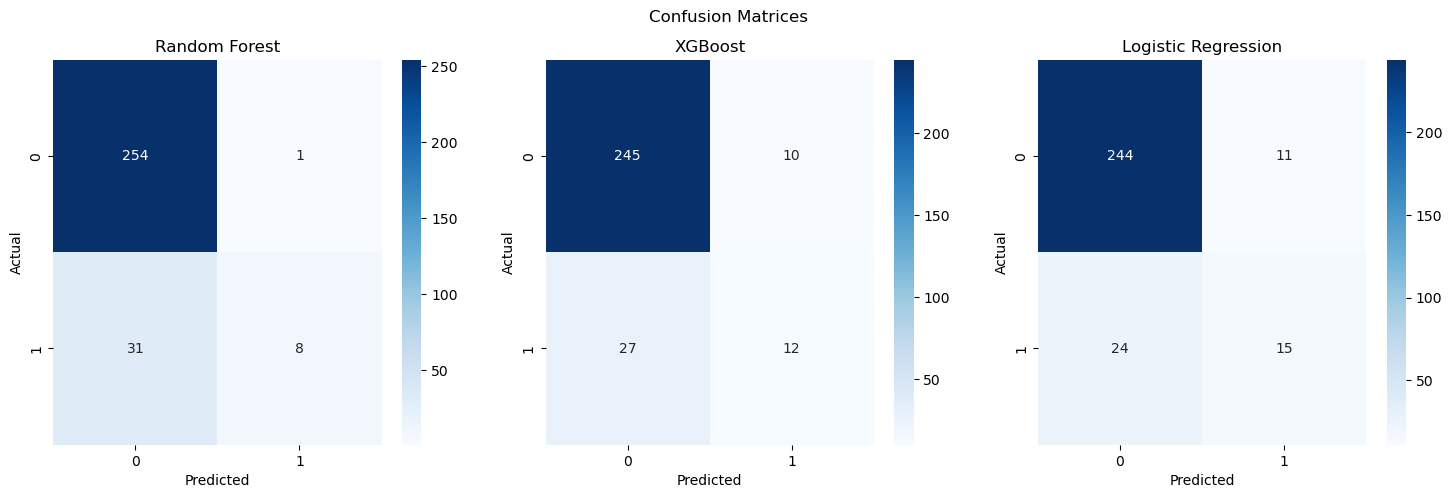

In [87]:
# Calculate confusion matrices
rf_cm = confusion_matrix(y_test, rf_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
logreg_cm = confusion_matrix(y_test, logreg_predictions)

# Plot confusion matrices manually
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices')

sns.heatmap(rf_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(xgb_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('XGBoost')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(logreg_cm, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Logistic Regression')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

### ROC Curves

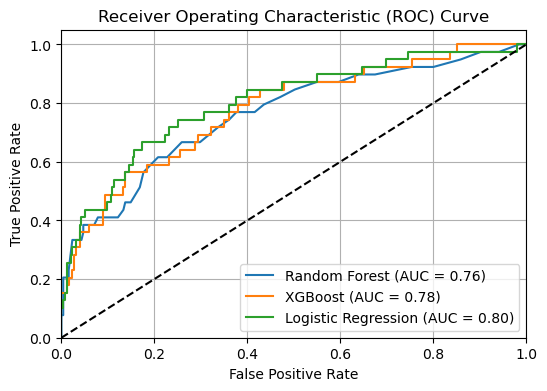

In [88]:
# Calculate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Calculate AUC-ROC
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

# Plot ROC curves
plt.figure(figsize=(6, 4))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Feature Count  Accuracy  Precision    Recall  F1 Score
0             10  0.877551   0.565217  0.333333  0.419355
1             15  0.863946   0.480000  0.307692  0.375000
2             20  0.863946   0.482759  0.358974  0.411765
3             25  0.857143   0.448276  0.333333  0.382353
4             30  0.870748   0.518519  0.358974  0.424242

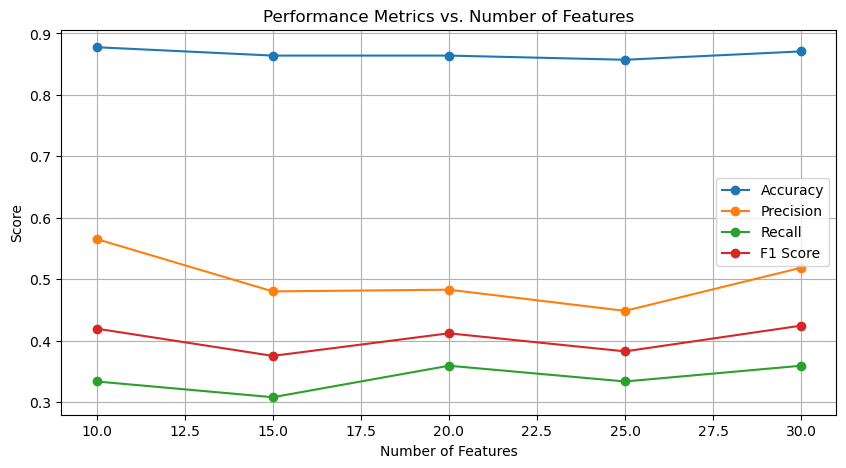

In [89]:
# Extract and rank coefficients by absolute importance
coefficients = np.abs(logreg_model.coef_[0])
sorted_indices = np.argsort(coefficients)[::-1]  # Sort in descending order

# Function to evaluate performance for different feature counts
def evaluate_feature_counts(X_train, y_train, X_test, y_test, sorted_indices, counts):
    results = []
    for count in counts:
        # Select top 'count' features
        selected_indices = sorted_indices[:count]
        X_train_selected = X_train[:, selected_indices]
        X_test_selected = X_test[:, selected_indices]

        # Train logistic regression on selected features
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
        model.fit(X_train_selected, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Append results
        results.append((count, accuracy, precision, recall, f1))
    
    return pd.DataFrame(results, columns=['Feature Count', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Evaluate for feature counts of 15, 20, and 25
feature_counts = [10, 15, 20, 25, 30]
performance_df = evaluate_feature_counts(X_train_scaled, y_train, X_test_scaled, y_test, sorted_indices, feature_counts)

# Display results
display(performance_df)

# Plotting the performance metrics
plt.figure(figsize=(10, 5))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(performance_df['Feature Count'], performance_df[metric], marker='o', label=metric)

plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# Extract non-zero coefficients
non_zero_indices = np.where(logreg_model.coef_[0] != 0)[0]
non_zero_features = X.columns[non_zero_indices]

# Create new data sets with only non-zero coefficient features
X_train_non_zero = X_train_scaled[:, non_zero_indices]
X_test_non_zero = X_test_scaled[:, non_zero_indices]

# Print retained features
print("Retained features with non-zero importance:", list(non_zero_features))

# Retrain the model with only important features
logreg_non_zero = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_non_zero.fit(X_train_non_zero, y_train)

# Evaluate the model
y_pred_non_zero = logreg_non_zero.predict(X_test_non_zero)

# Calculate performance metrics
accuracy_non_zero = accuracy_score(y_test, y_pred_non_zero)
recall_non_zero = recall_score(y_test, y_pred_non_zero)
precision_non_zero = precision_score(y_test, y_pred_non_zero)
f1_non_zero = f1_score(y_test, y_pred_non_zero)

print(f"Accuracy with Non-Zero Features: {accuracy_non_zero:.4f}")
print(f"Precision with Non-Zero Features: {precision_non_zero:.4f}")
print(f"Recall with Non-Zero Features: {recall_non_zero:.4f}")
print(f"F1 Score with Non-Zero Features: {f1_non_zero:.4f}")

Retained features with non-zero importance: ['JobLevel', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Avg_Satisfaction_Score', 'Young_Single_LowIncome', 'Overworked_HighStress', 'JobDissatisfaction', 'CareerProgressionIssues', 'MisalignedRoleTenure', 'CommuteOverworkStress', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Medical', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'OverTime_Yes', 'MaritalStatus_Grouped_Single', 'Education_Grouped_Level 4-5', 'TrainingTimesLastYear_Grouped_More_than_4_Trainings', 'Age_Grouped_Over_40', 'Age_Grouped_Under_30', 'Dis

**Observations:** Although the Accuracy improves to 88.1% with non-zero importance features, Recall and F1 Score are lower than Logistic Regression L1 before feature engineering.

**Next Steps:** Consult with HR experts to collect more data or focus on other interaction terms to increase Recall while maintaining (or better increasing) Accuracy rate. 